# Bike Sharing: Multiple Linear Regression

## <a id='top'>Outline:<a />

1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
    1. [Data Cleaning](#data-cleaning)
    2. [Data Transformation](#data-transformation)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
    1. [Univariate Analysis](#univariate-analysis)
    2. [Bivariate Analysis](#bivariate-analysis)
4. [Feature Engineering](#feature-engineering)
    1. [Feature Scaling](#feature-scaling)
    2. [Feature Encoding](#feature-encoding)
    3. [Feature Selection](#feature-selection)
4. [Model Building](#model-building)
5. [Model Evaluation](#model-evaluation)
6. [Conclusion](#conclusion)

# **<a id='introduction'>1. INTRODUCTION<a/>**  [▲](#top)

### PROBLEM STATEMENT

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### BUSINESS GOAL

> To Model the demand for shared bikes with the available independent variables, which would be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model would be a good way for management to understand the demand dynamics of a new market. 

### IMPORTING REQUIRED LIBRARIES

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, zscore

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [3]:
# Set Visualization theme
sns.set_theme()
sns.set_context("talk")

### LOADING THE DATASET

In [4]:
#Read the csv file using pandas
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_sharing.shape

(730, 16)

#### OBSERVATIONS

- There are 730 rows and 16 columns in the dataset. There are no non-null columns in the entire dataset.
- `dteday` should be in datetime format but it is in object datatype.
- All the other columns are either float or int.
- Some columns logically make sense to be treated as categorical variables but are in int/float datatype, e.g. `season`, `yr`, `mnth`, etc.

### IDENTIFY THE TYPE OF THE COLUMNS

In [8]:
bike_sharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### OBSERVATIONS

The **Categorical Columns** are:

> `season`, `year`, `month`, `holiday`, `weekday`, `working_day`, and `weather_situations`.

However, the **Numerical Columns** are:

> `temperature`, `apparent_temperature`, `humidity`, `wind_speed`, and `count`.

# **<a id='data-preprocessing'>2. DATA PREPROCESSING<a/>**  [▲](#top)

## **<a id='data-cleaning'>A. DATA CLEANING<a/>**  [▲](#top)

### CHECK FOR MISSING VALUES

In [9]:
# Column-wise
bike_sharing.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

> There are **NO Null Values** in columns.

In [10]:
# Row-wise
bike_sharing[bike_sharing.isnull().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


> There are **NO Null Values** in rows.

### CHECK FOR DATA DUPLICACY

In [11]:
bike_sharing[bike_sharing.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


> There are **NO Duplicate Rows** in the dataset.

## **<a id='data-transformation'>B. DATA TRANSFORMATION<a/>**  [▲](#top)

### DROP RENDUNDANT COLUMNS

In [12]:
bike_sharing.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [13]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Based on the Data Definitions and observations on the columns of the dataset, some columns appear to be redundant:

1. `instant`: Instant is merely an index for the dataset.
<br>

2. `dteday`: Since we already have the columns `yr`, `mnth` and `weekday` we no longer need this column.
<br>

3. `casual` and `registered`: The variables casual and registered represent different user types in the bike rental data. Specifically:
    - `casual`: Indicates the number of casual users who have made a rental.
    - `registered`: Shows the total number of registered users who have made a booking on a given day.
    - `cnt`: Represents the total number of bike rentals, including both casual and registered users.
    - Both `casual` and `registered` are directly additive to `cnt`. Including them in the model would add redundant information and could lead to **multicollinearity**, where independent variables are highly correlated with each other, making it harder to assess the effect of each variable. 
    - When building a predictive model for bike rentals, the `cnt` variable provides the comprehensive target we aim to predict.

In [14]:
bike_sharing.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

In [15]:
bike_sharing.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


In [16]:
# Renaming some ambiguous columns
bike_sharing = bike_sharing.rename(columns = {
    'yr': 'year',
    'mnth': 'month',
    'workingday': 'working_day',
    'weathersit': 'weather_situations',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'cnt': 'count'
})

In [17]:
bike_sharing.head(2)

,season,year,month,holiday,weekday,working_day,weather_situations,temperature,apparent_temperature,humidity,wind_speed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


In [18]:
bike_sharing.shape

(730, 12)

### HANDLING OUTLIERS FOR NUMERICAL COLUMNS (IQR METHOD)

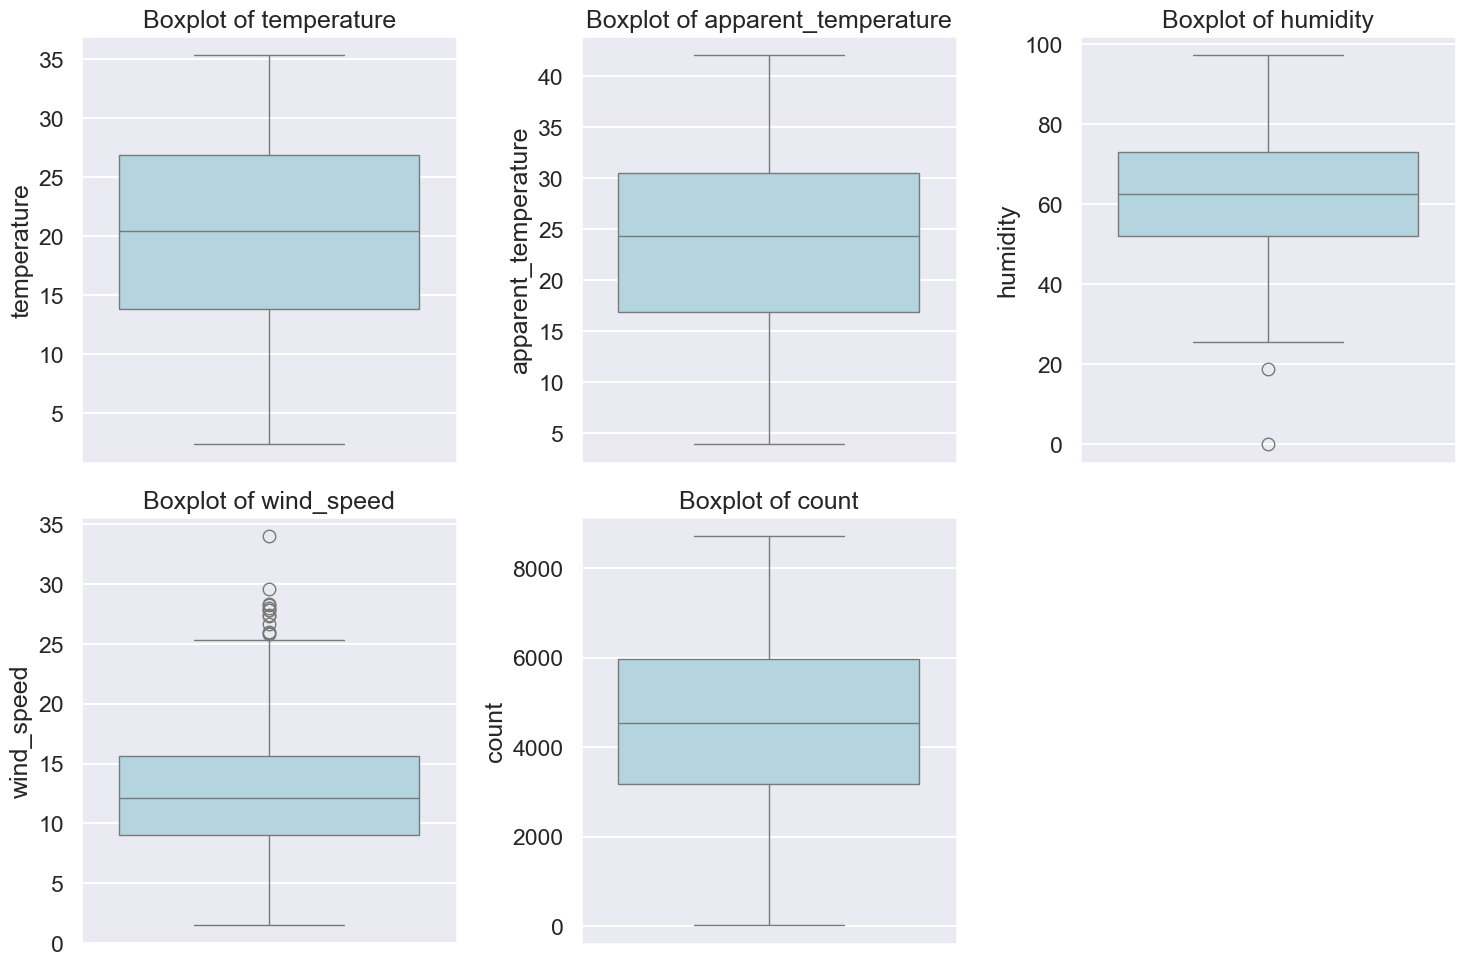

In [19]:
# List of columns to plot
columns_to_plot = ['temperature', 'apparent_temperature', 'humidity', 'wind_speed', 'count']

# Create a figure and axes
plt.figure(figsize=(15, 10))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=bike_sharing[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

In [20]:
# Define the Z-score threshold
z_score_threshold = 3

# Iterate over each column to handle outliers
for column in columns_to_plot:
    # Calculate the Z-scores for the column
    z_scores = zscore(bike_sharing[column])
    
    # Filter out outliers
    bike_sharing = bike_sharing[(z_scores >= -z_score_threshold) & (z_scores <= z_score_threshold)]
    
bike_sharing.head()

,season,year,month,holiday,weekday,working_day,weather_situations,temperature,apparent_temperature,humidity,wind_speed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


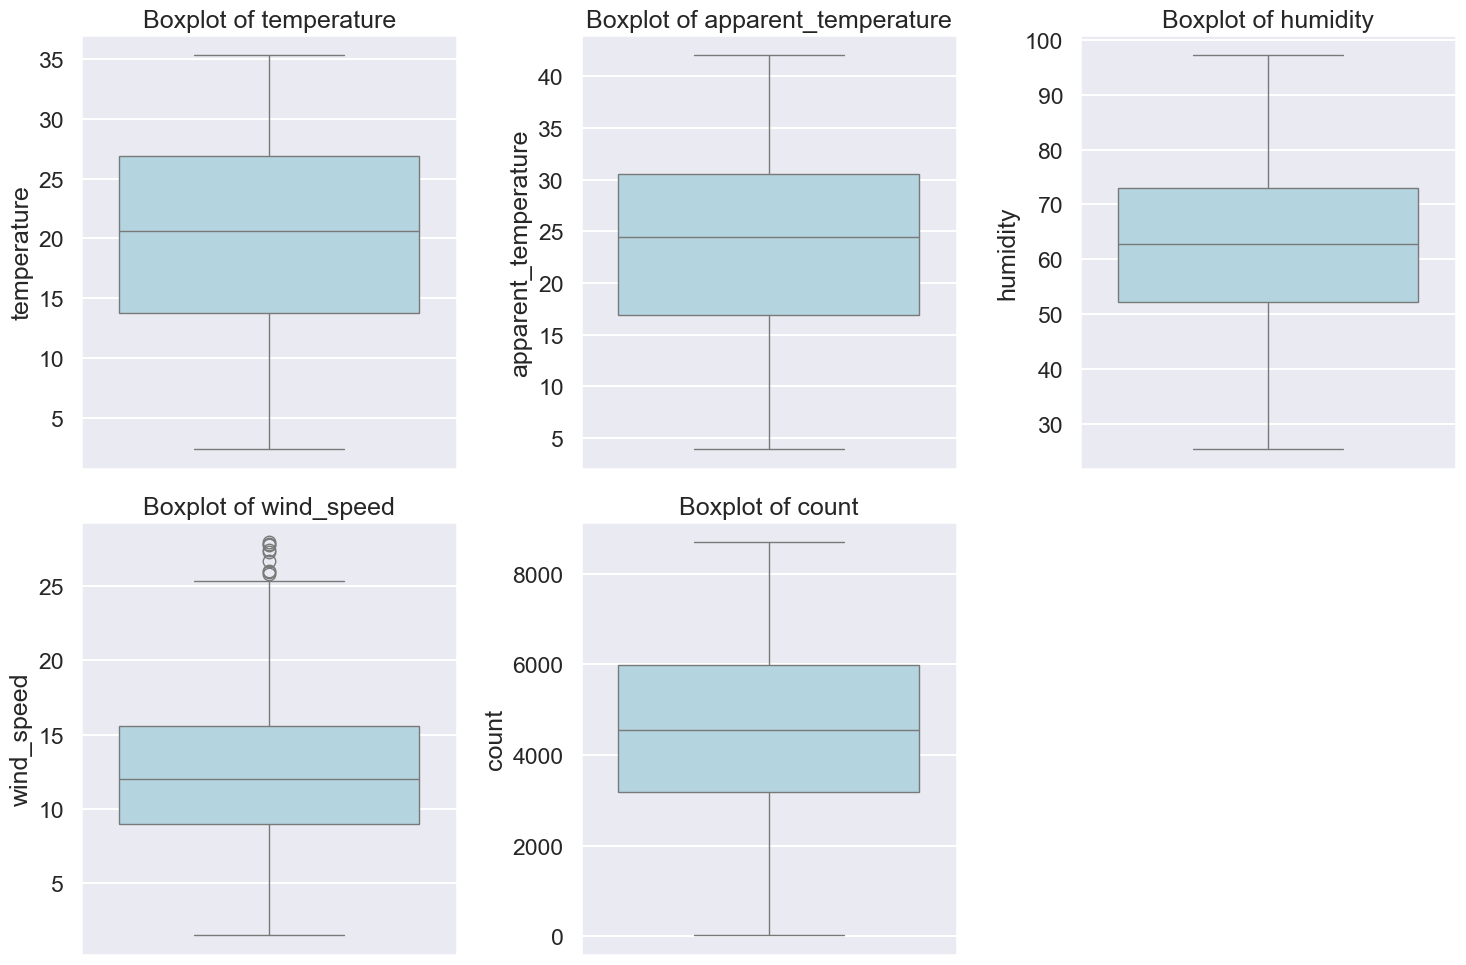

In [21]:
# Create a figure and axes
plt.figure(figsize=(15, 10))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=bike_sharing[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

- `temperature`, `apparent_temperature`, and `count` had no outliers.
- `humidity` and `wind_speed` had some outliers and we handled them using the IQR method.
- And now, we can see that we have handled the outliers for all the Numerical Columns.

### HANDLING THE VALUES OF CATEGORICAL COLUMNS

In [22]:
bike_sharing.season.value_counts().sort_index()

season
1    176
2    184
3    188
4    177
Name: count, dtype: int64

In [23]:
bike_sharing.year.value_counts().sort_index()

year
0    362
1    363
Name: count, dtype: int64

In [24]:
bike_sharing.month.value_counts().sort_index()

month
1     62
2     54
3     60
4     60
5     62
6     60
7     62
8     62
9     60
10    61
11    60
12    62
Name: count, dtype: int64

In [25]:
bike_sharing.holiday.value_counts().sort_index()

holiday
0    704
1     21
Name: count, dtype: int64

In [26]:
bike_sharing.weekday.value_counts().sort_index()

weekday
0    105
1    105
2    104
3    103
4    101
5    104
6    103
Name: count, dtype: int64

In [27]:
bike_sharing.working_day.value_counts().sort_index()

working_day
0    229
1    496
Name: count, dtype: int64

In [28]:
bike_sharing.weather_situations.value_counts().sort_index()

weather_situations
1    459
2    246
3     20
Name: count, dtype: int64

> Using the **Data Dictionary** we can replace the values of the columns as:

In [29]:
bike_sharing.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)

bike_sharing.year.replace({0: 2018, 1: 2019}, inplace=True)

bike_sharing.month.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
                            7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace=True)

bike_sharing.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace=True)

bike_sharing.weather_situations.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace=True)


bike_sharing.head()

,season,year,month,holiday,weekday,working_day,weather_situations,temperature,apparent_temperature,humidity,wind_speed,count
0,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


# **<a id='exploratory-data-analysis'>3. EXPLORATORY DATA ANALYSIS (EDA)<a/>**  [▲](#top)

In [30]:
bike_sharing.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'working_day',
       'weather_situations', 'temperature', 'apparent_temperature', 'humidity',
       'wind_speed', 'count'],
      dtype='object')

In [31]:
# Categorizing all the columns
num_cols = ['temperature', 'apparent_temperature', 'humidity', 'wind_speed', 'count']
cat_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'working_day', 'weather_situations']

## **<a id='univariate-analysis'>A. UNIVARIATE ANALYSIS<a/>**  [▲](#top)

### NUMERICAL FEATURES

In [32]:
round(bike_sharing[num_cols].describe(), 2)

,temperature,apparent_temperature,humidity,wind_speed,count
count,725.00,725.00,725.00,725.00,725.0
mean,20.34,23.75,62.95,12.66,4519.0
std,7.52,8.16,13.97,5.05,1932.9
min,2.42,3.95,25.42,1.50,22.0
25%,13.80,16.89,52.21,9.00,3194.0
50%,20.60,24.46,62.75,12.04,4553.0
75%,26.89,30.52,73.04,15.58,5986.0
max,35.33,42.04,97.25,28.00,8714.0


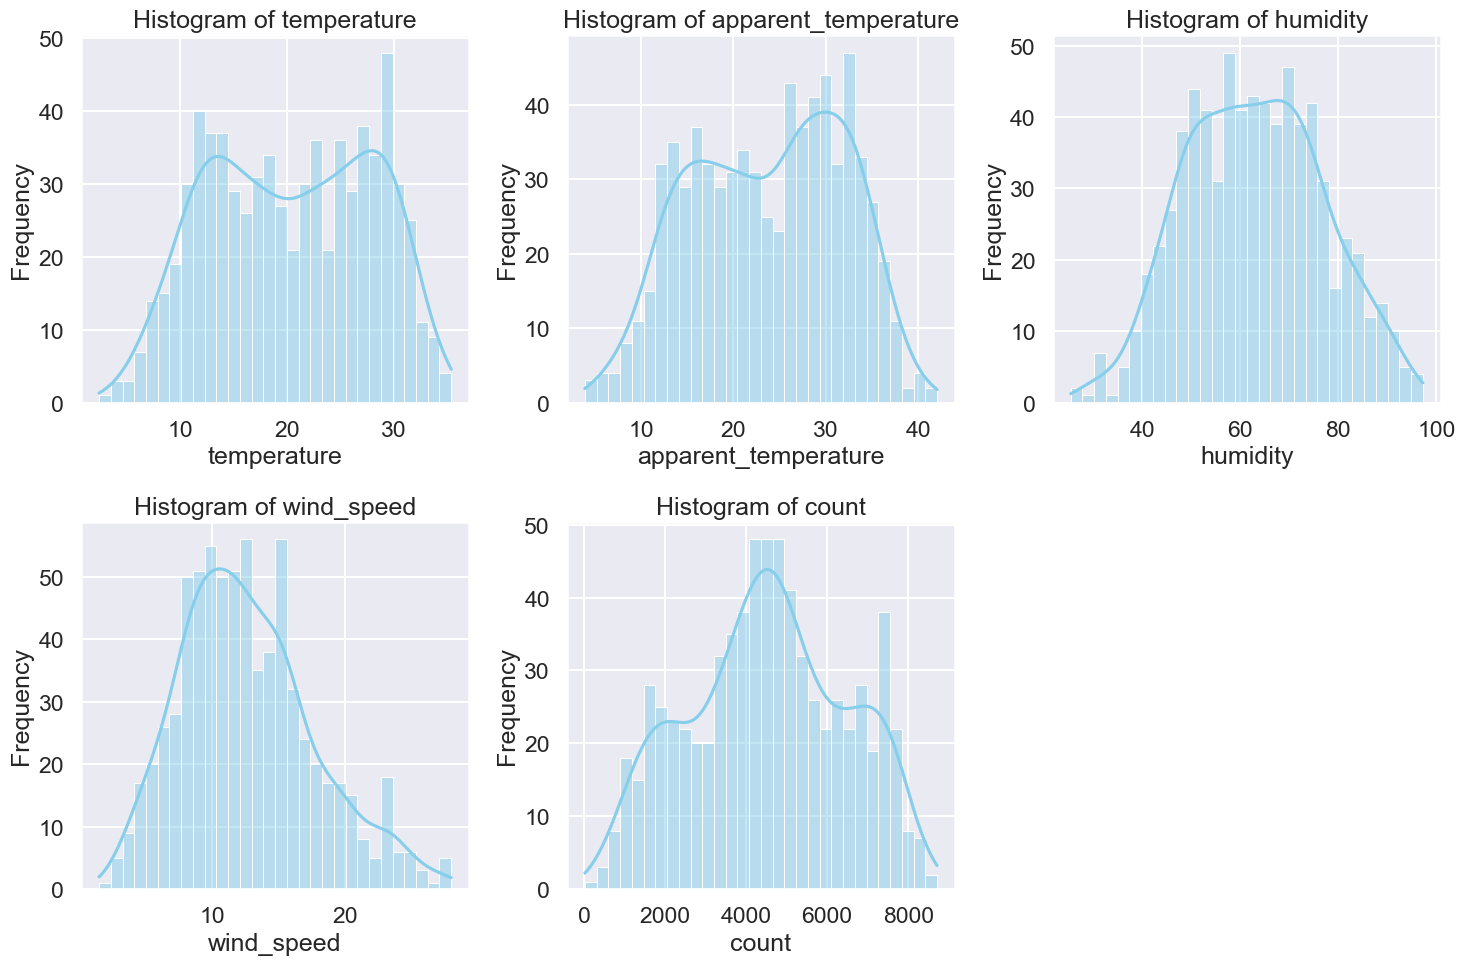

In [33]:
# Create a figure and axes
plt.figure(figsize=(15, 10))

# Loop through numerical columns and plot histograms
for i, column in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(bike_sharing[column], bins=30, color='skyblue', edgecolor='white', kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

In [34]:
bike_sharing['temperature'].skew()

-0.06377108614740612

In [35]:
bike_sharing['apparent_temperature'].skew()

-0.13909166536644627

In [36]:
bike_sharing['humidity'].skew()

0.06319538939714242

In [37]:
bike_sharing['wind_speed'].skew()

0.568054921289236

In [38]:
bike_sharing['count'].skew()

-0.05053457664190758

#### OBSERVATIONS

1. `temperature`, `apparent_temperature` and `count` have **Multiple Peaks** and relatively **Low Skewness**.

2. `humidity` has **Low Skewness** and `wind_speed` has a **Moderate Positive Skewness**.

3. Highest Frequency of `count` is observed around 4000.

### CATEGORICAL FEATURES

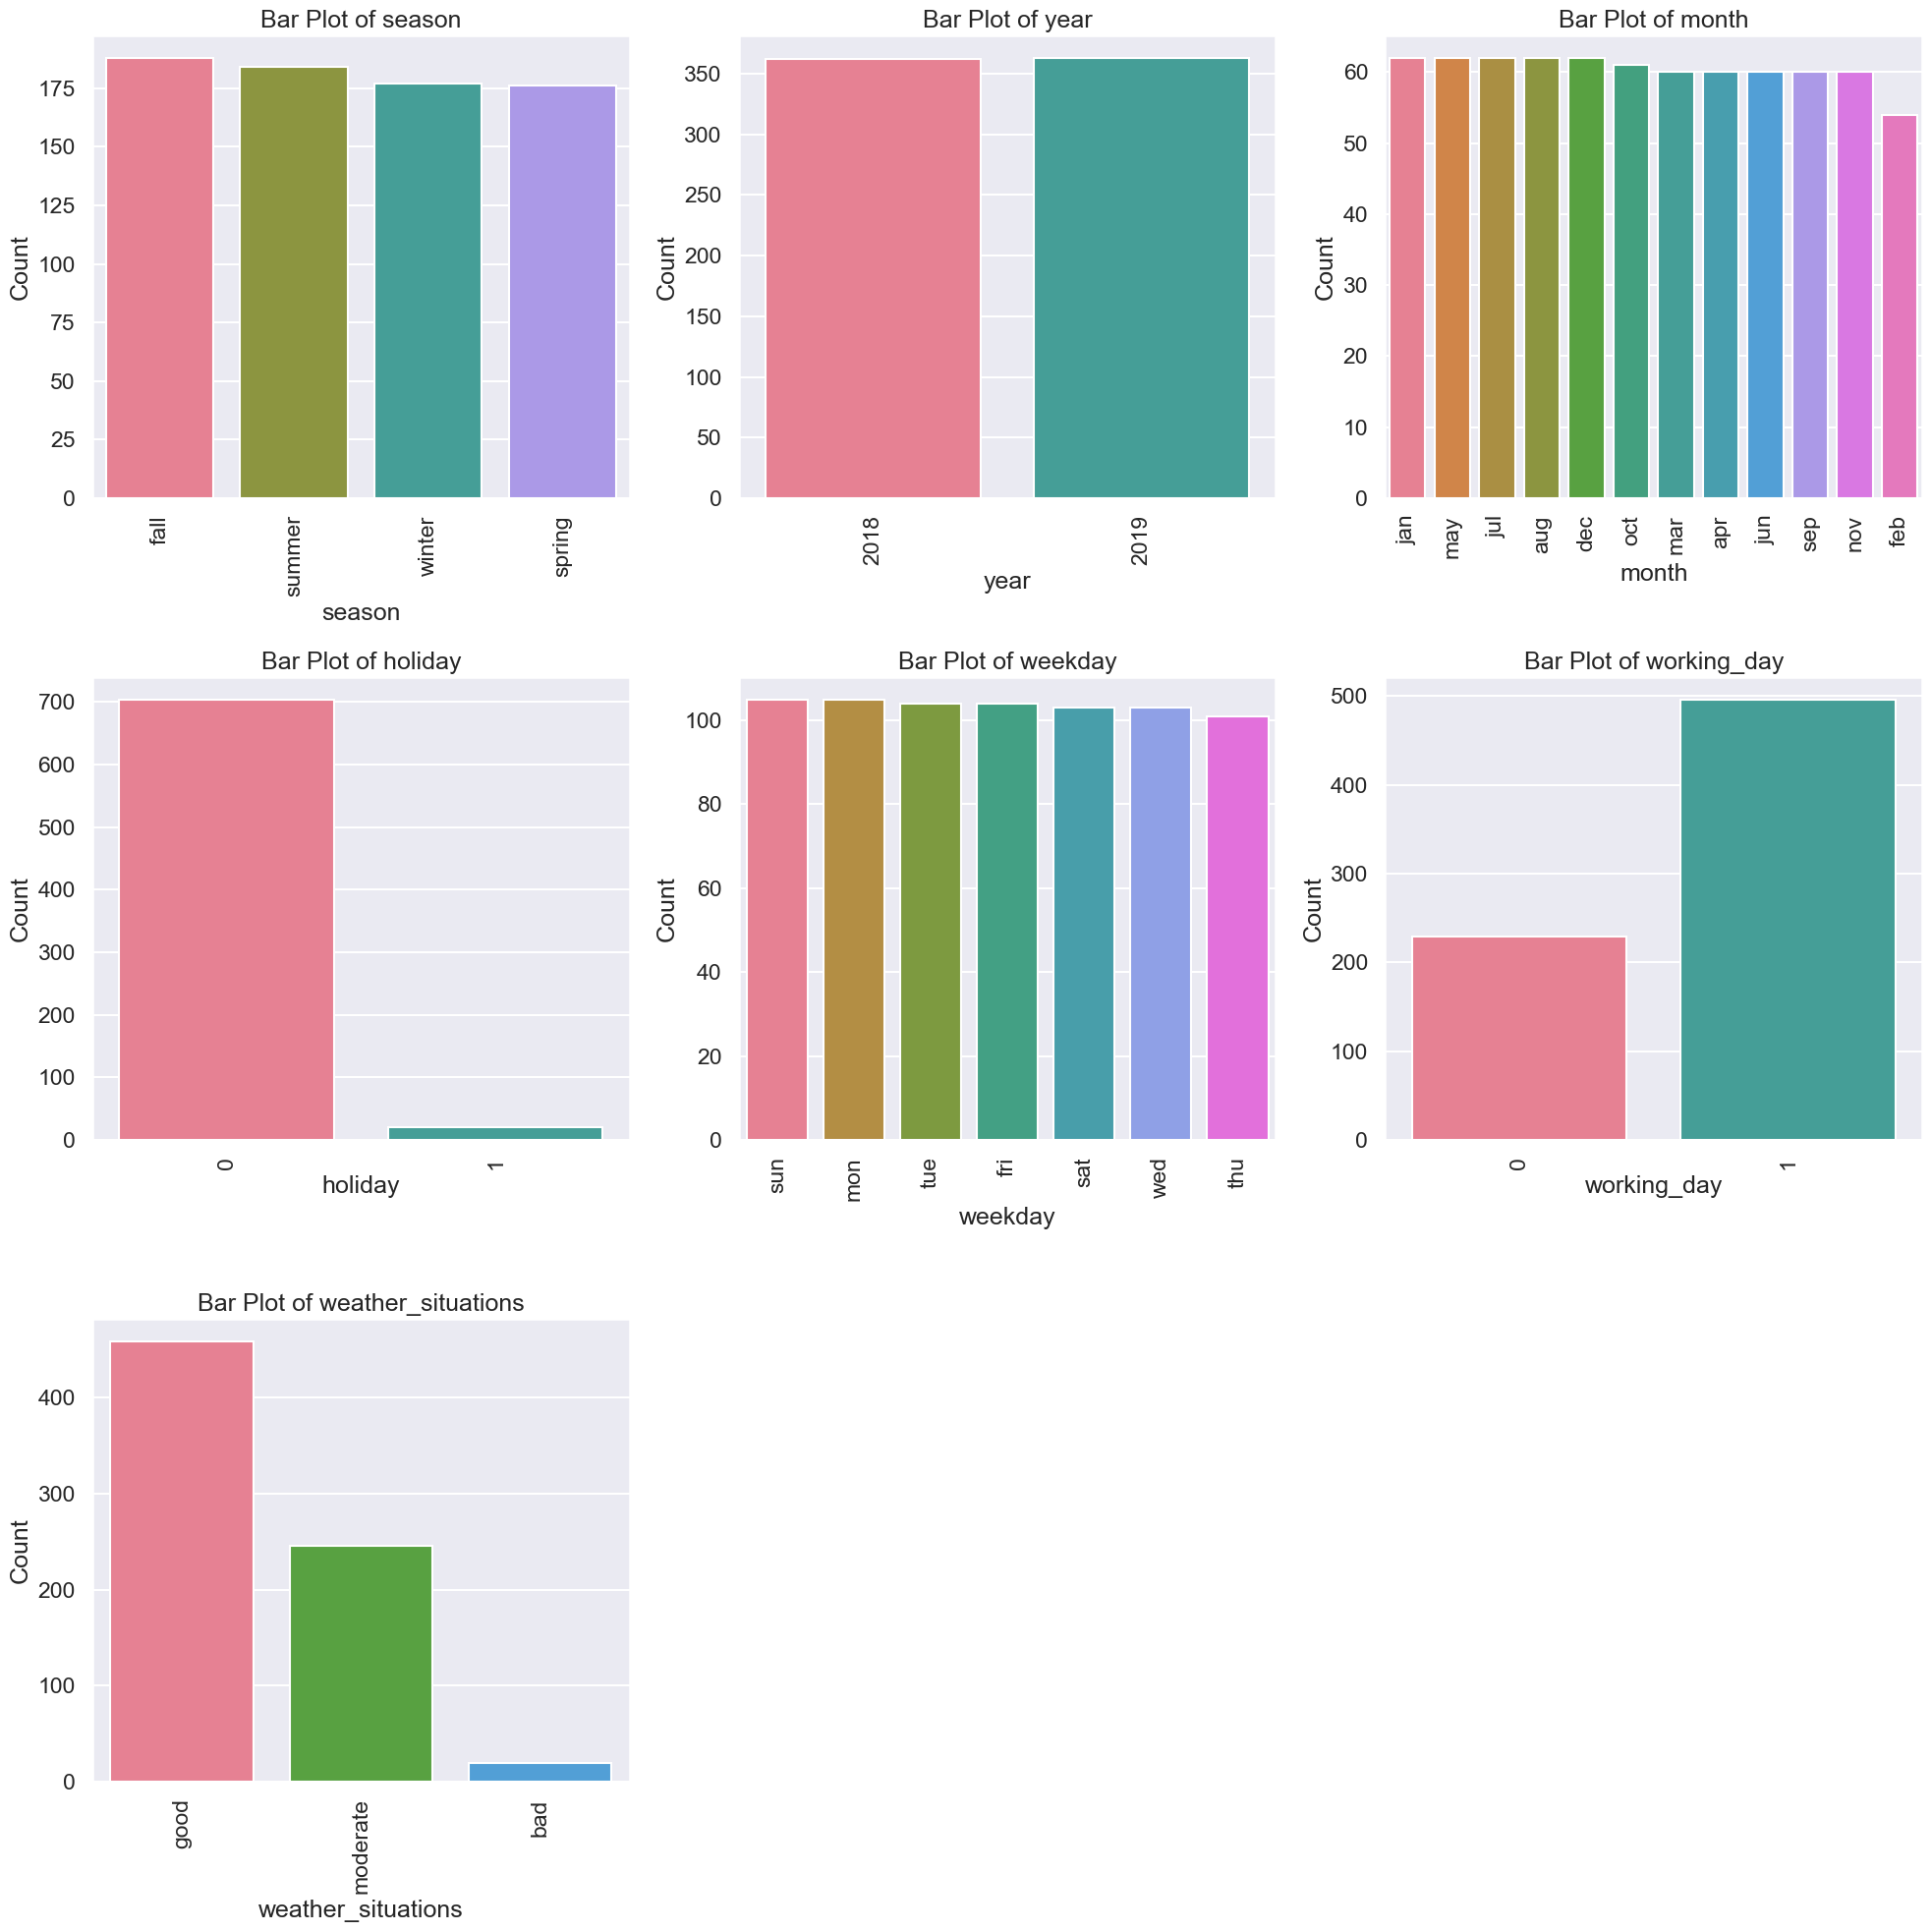

In [39]:
# Create a figure and axes
plt.figure(figsize=(20, 20))

# Loop through categorical columns and plot bar plots
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    
    # Calculate counts of each category
    count_data = bike_sharing[column].value_counts()
    
    # Create a bar plot
    sns.barplot(x=count_data.index, y=count_data.values, palette='husl')
    
    # Set title and labels
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='center')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. Demand is higher on the days when weather situations are **GOOD**.
2. Demand is higher on the **working days** and lower on the holidays and weekends.
3. Season, Year, Month, and Weekday individually have no significant impact on the demand for bikes.

## **<a id='bivariate-analysis'>B. BIVARIATE ANALYSIS<a/>**  [▲](#top)

### CORRELATION BETWEEN NUMERICAL FEATURES

***Correlation Criteria:*** Correlation Coefficient (r) measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

- 1: Perfect positive linear relationship
- -1: Perfect negative linear relationship
- 0: No linear relationship

***Common Criteria:***

- |r| < 0.1: Weak correlation; the relationship between the variables is minimal.
- 0.1 ≤ |r| < 0.3: Moderate correlation; some relationship exists, but it's not very strong.
- 0.3 ≤ |r| < 0.5: Strong correlation; there is a notable relationship between the variables.
- |r| ≥ 0.5: Very strong correlation; the variables are highly related.

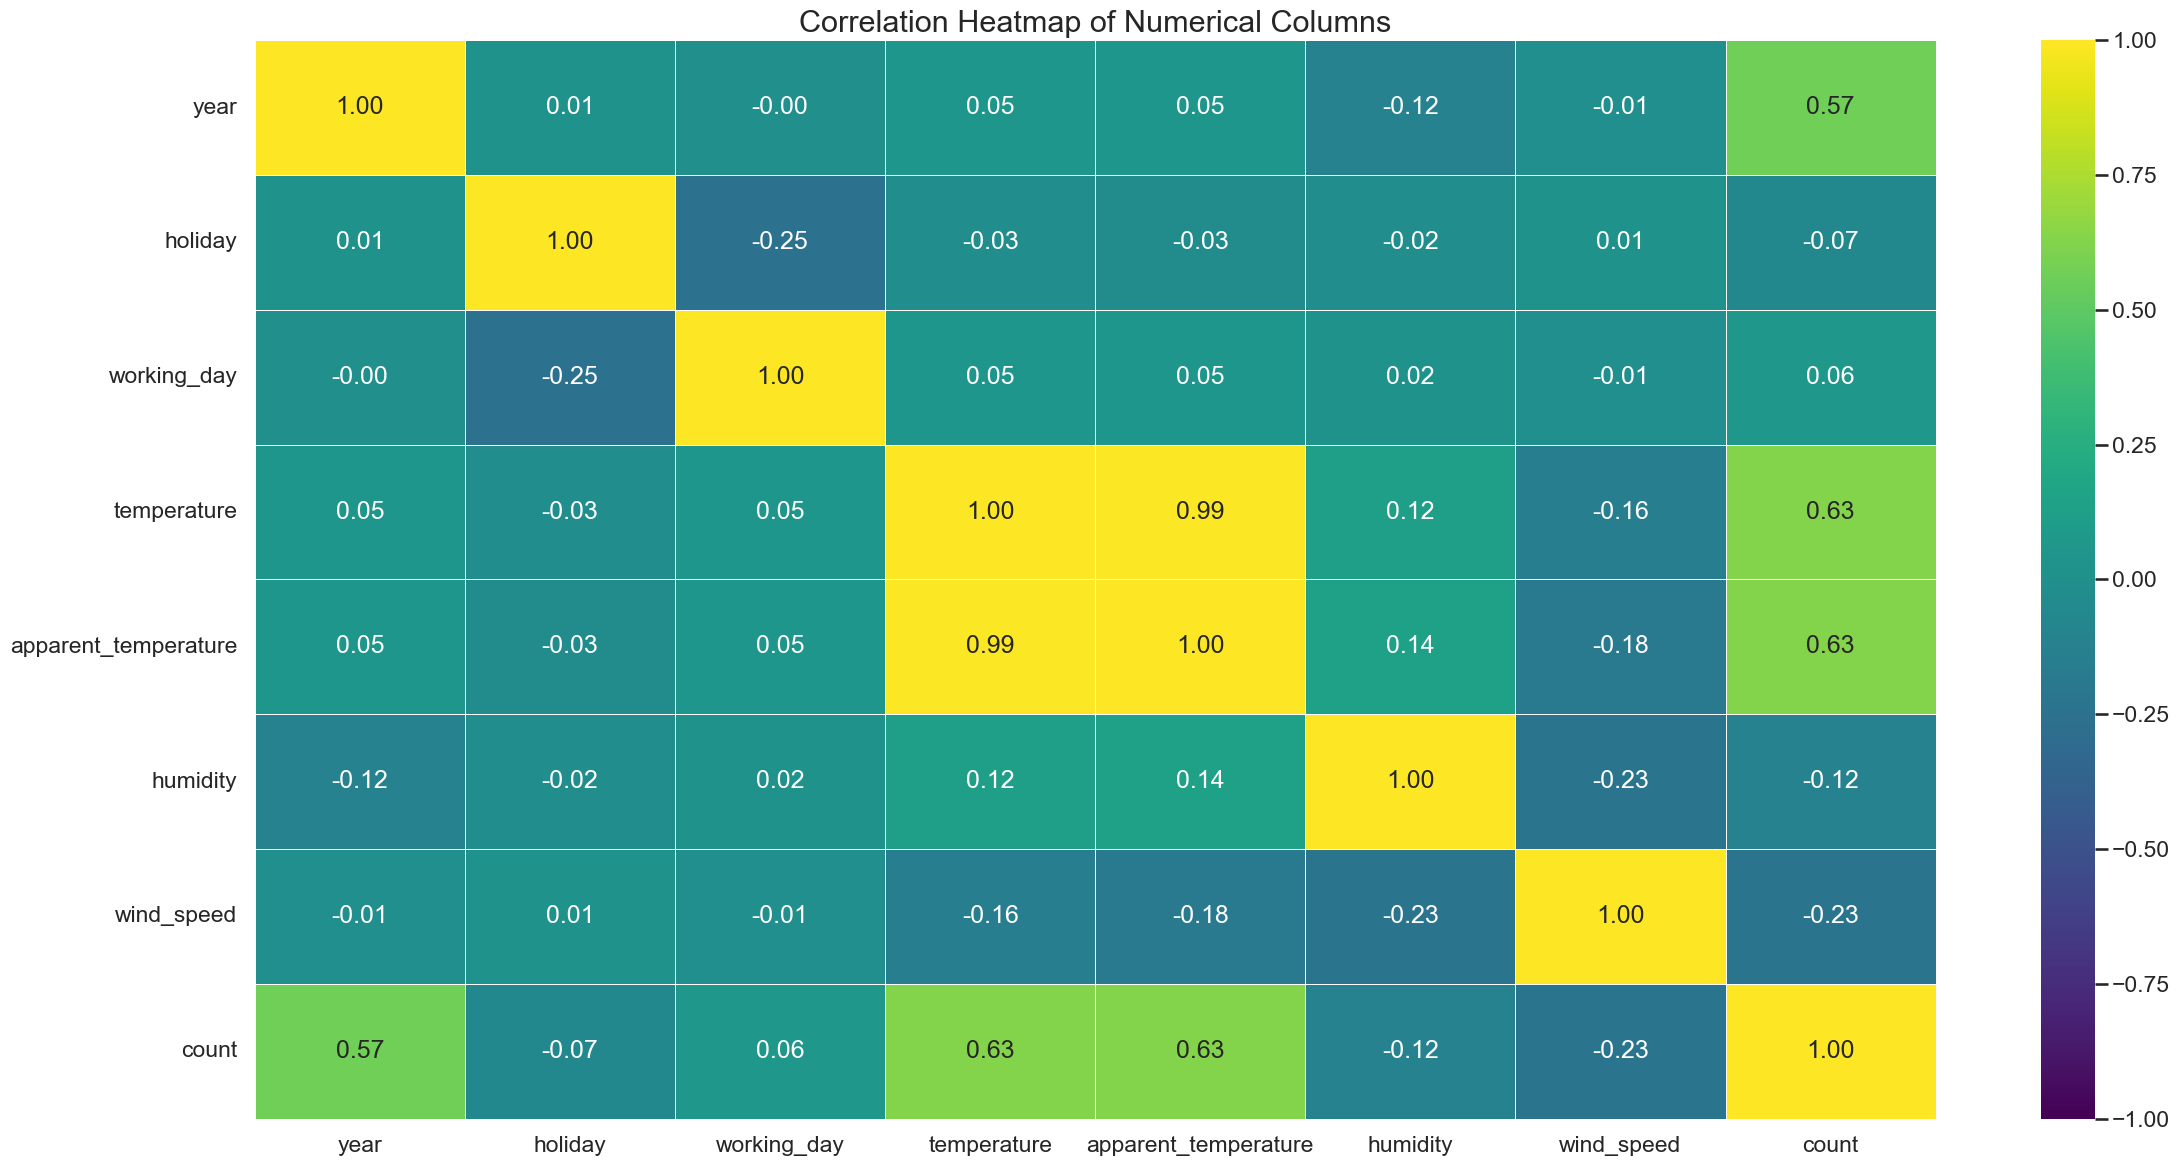

In [40]:
# Compute correlation matrix
corr_matrix = bike_sharing.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(24, 12))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Columns', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
bike_sharing['apparent_temperature'].corr(bike_sharing['temperature'])

0.9917214874582302

#### OBSERVATIONS

1. `count` shows significant positive correlations with `temperature` and `apparent_temperature`, moderate correlation with `year` and moderate inverse correlation with `wind_speed`.

2. Given that `temperature` and `apparent_temperature` are highly correlated with each other (approximately 1), we should consider dropping `apparent_temperature` before performing linear regression. This is because including both features in the model can lead to **multicollinearity**, which inflates the variance of the coefficient estimates and makes the model's predictions unstable and less interpretable. By dropping one of these highly correlated features, we can reduce multicollinearity, leading to more reliable and interpretable regression coefficients.

3.  `working_day` and `holiday` have a moderate negative correlation. 
4. `humidity` has moderate correlation with `wind_speed`, `year`, `temperature`, `apparent_teperature` and `count`. Hence it must be check for multicollinearity.

### TARGET VS NUMERICAL FEATURES

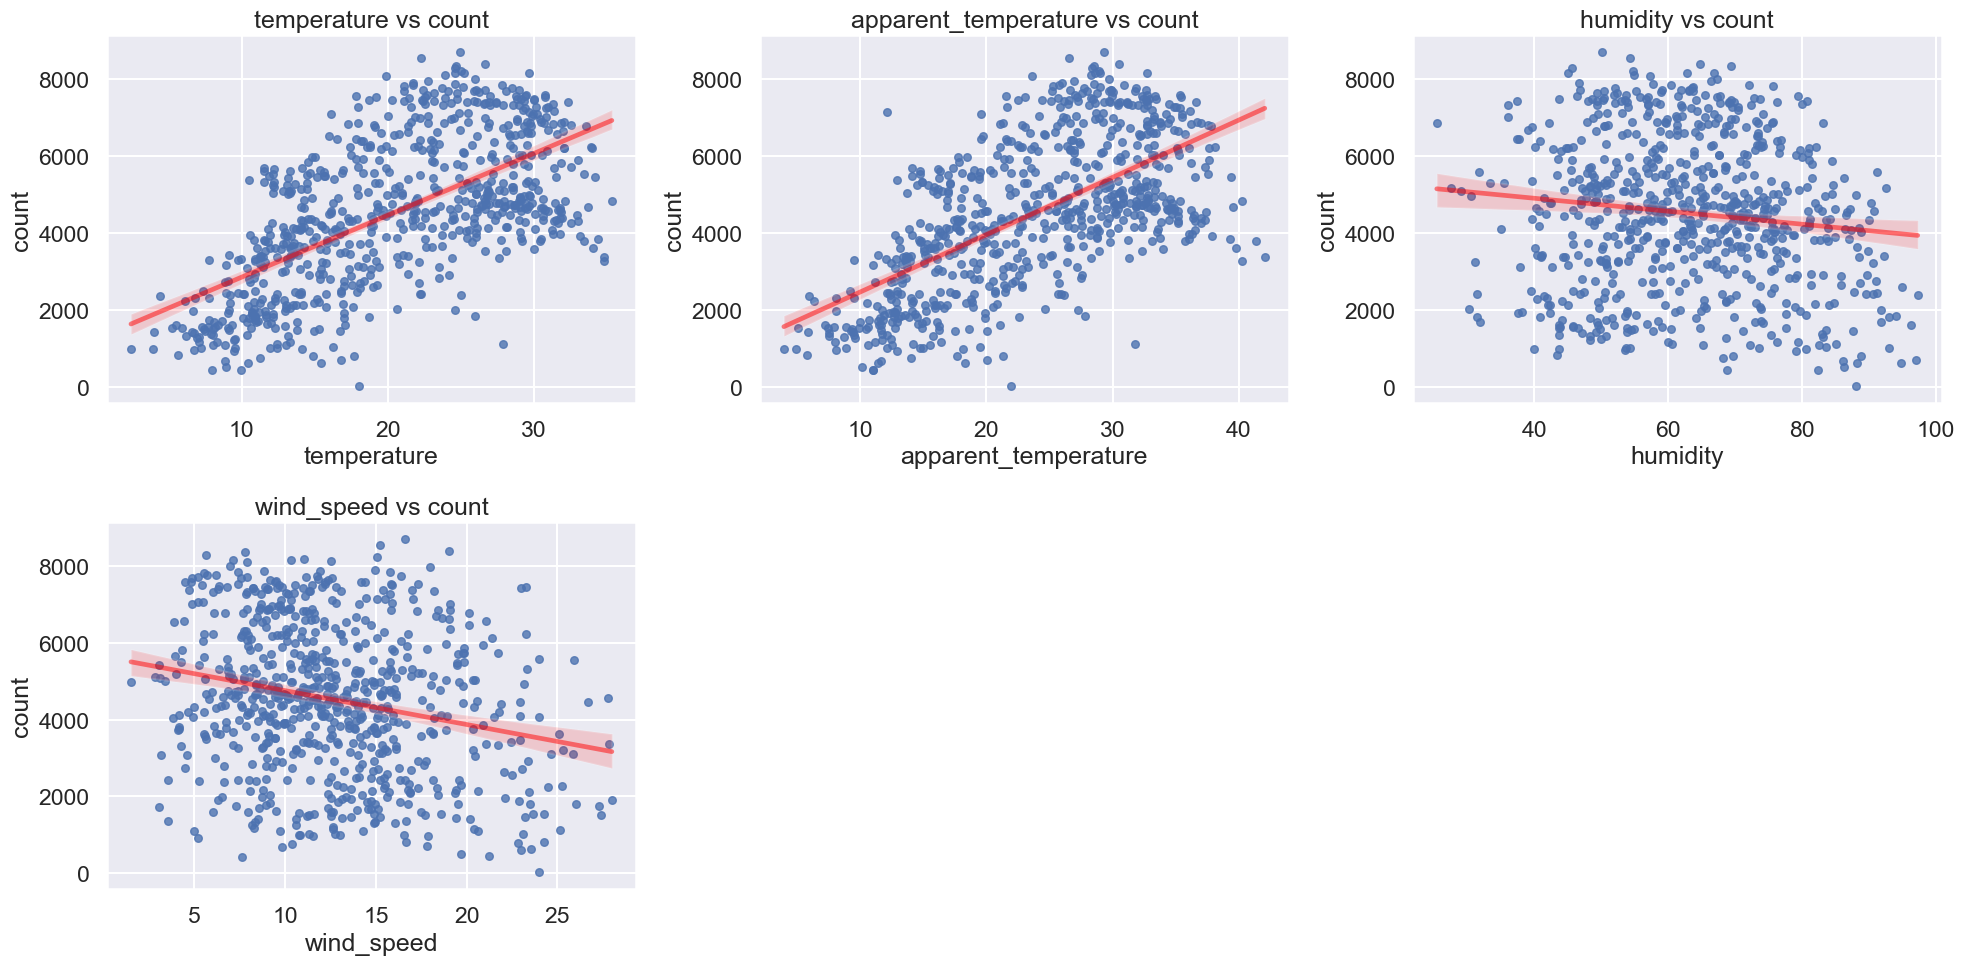

In [42]:
# Create a figure and axes
plt.figure(figsize=(20, 10))

# Create a regplot for each numerical column
y_col = 'count'
for i, x_col in enumerate(num_cols):
    if x_col is not 'count':
        plt.subplot(2, 3, i + 1)
        sns.regplot(x=x_col, y=y_col, data=bike_sharing, scatter_kws={'s':30}, line_kws={'color':'red', 'alpha':0.5})
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'{x_col} vs {y_col}')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

### TARGET VS CATEGORICAL FEATURES

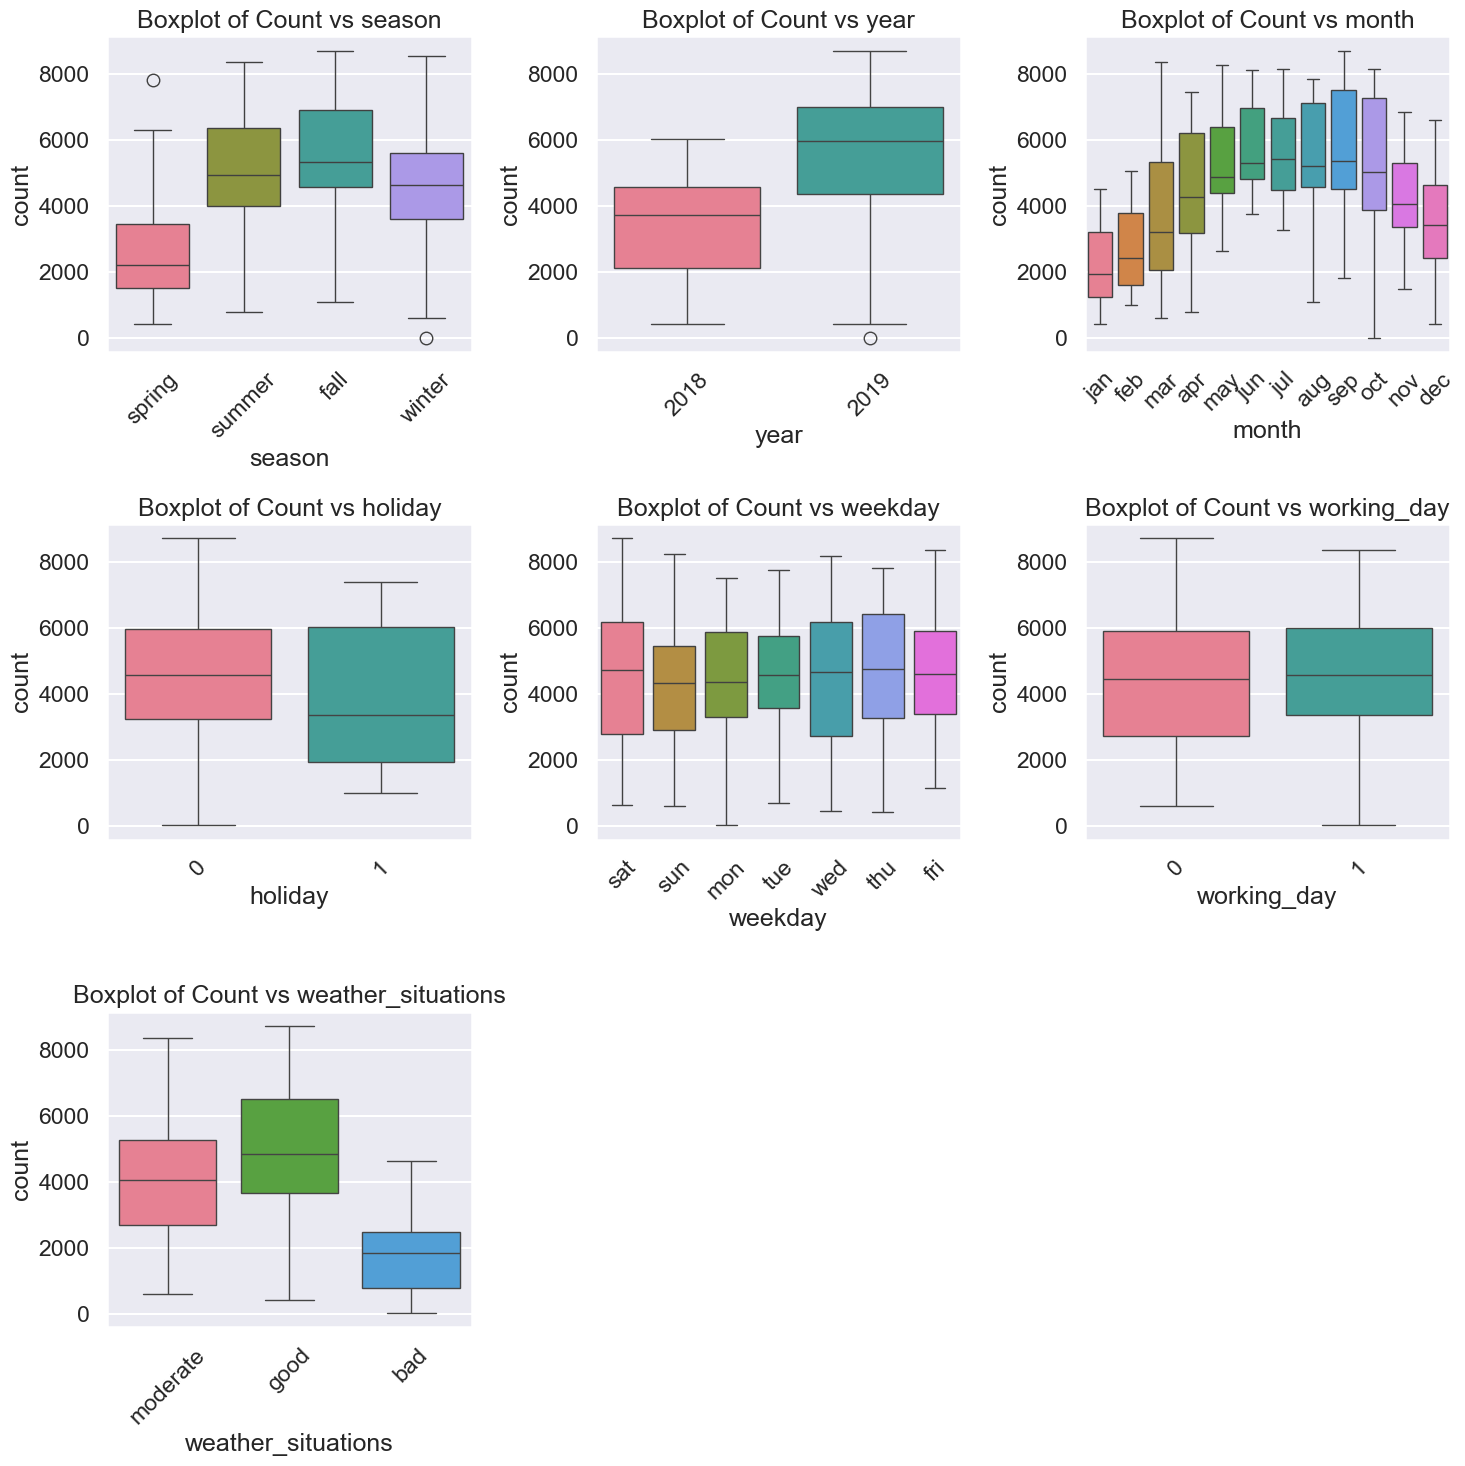

In [43]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Create a boxplot for each categorical column
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=column, y='count', data=bike_sharing, palette='husl')
    plt.title(f'Boxplot of Count vs {column}')
    plt.xticks(rotation=45, ha='center')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. Demand for bike rentals is highest in the **Fall Season**.
2. There is **Year-on-Year Increase** in demand between 2018 and 2019.
3. Demand is highest in the Dry months of **June-October**.
4. Though demand is low on Holidays, the boxplot shows high variability in distribution.
5. **Good Weather Situations** contribute to Higher demands.
6. Demand is variable by weekdays, working days and hence shows no interesting trends.

# **<a id='feature-engineering'>4. FEATURE ENGINEERING<a/>**  [▲](#top)

## **<a id='feature-encoding'>A. FEATURE ENCODING<a/>**  [▲](#top)

In [44]:
bike_sharing.head()

,season,year,month,holiday,weekday,working_day,weather_situations,temperature,apparent_temperature,humidity,wind_speed,count
0,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [45]:
# The following code performs 3 things:
# 1) Creates Dummy variables
# 2) Drops the original variable for which the dummies were created
# 3) Drops the first dummy variable for each set of dummies created

bike_sharing = pd.get_dummies(data=bike_sharing, 
                              columns=['season', 'year','month', 'weekday'], 
                              drop_first=True,
                              dtype=int)

# Different approach for `weather_situations`
# All the three dummies created from `weather_situations` were significantly correlated to each other.
# Hence we remove the variables later on.
bike_sharing = pd.get_dummies(data=bike_sharing, 
                              columns=['weather_situations'],
                              dtype=int)
bike_sharing.head()

,holiday,working_day,temperature,apparent_temperature,humidity,wind_speed,count,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_situations_bad,weather_situations_good,weather_situations_moderate
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


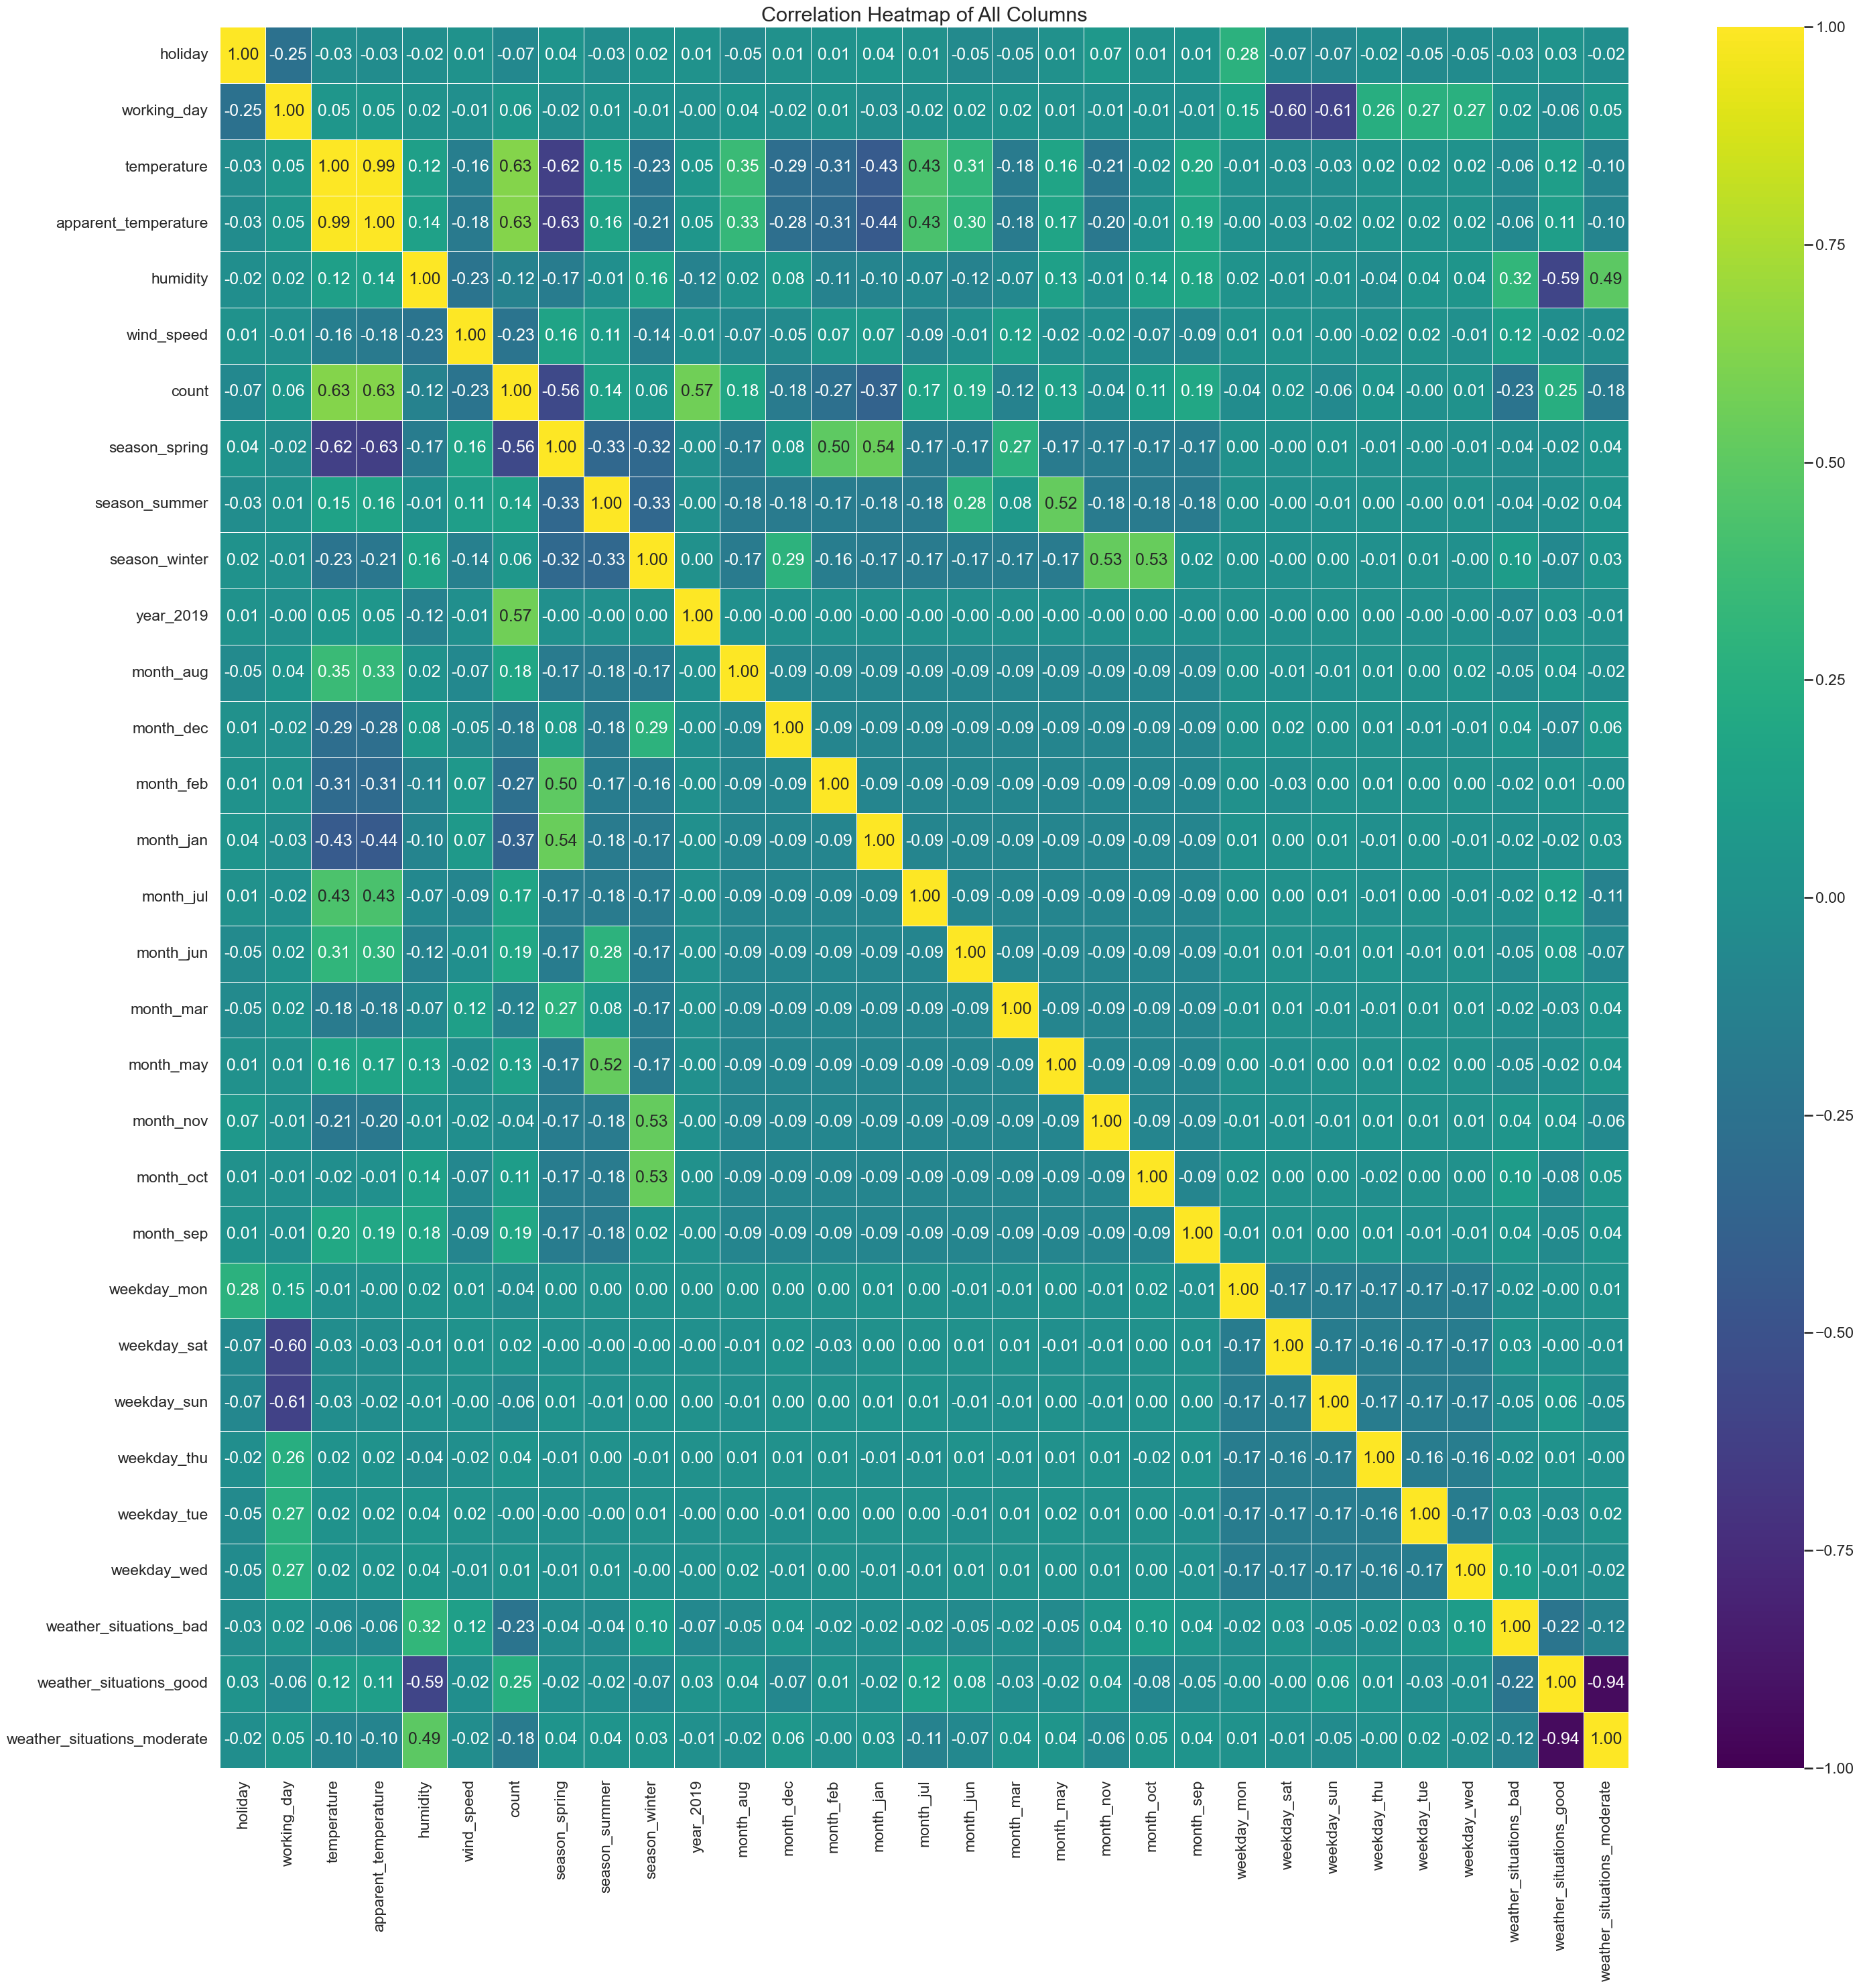

In [46]:
# Compute correlation matrix
corr_matrix = bike_sharing.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of All Columns', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

***Correlation Criteria:***

- |r| < 0.1: Weak correlation; the relationship between the variables is minimal.
- 0.1 ≤ |r| < 0.3: Moderate correlation; some relationship exists, but it's not very strong.
- 0.3 ≤ |r| < 0.5: Strong correlation; there is a notable relationship between the variables.
- |r| ≥ 0.5: Very strong correlation; the variables are highly related.

#### OBSERVATIONS

1. **Count Variable:** Very Strong positive correlations with `temperature` and `year_2019`. Very Strong negative correlation with `season_spring`. 
2. **Season Spring and Temperature:** `season_spring` and `temperature` have a very strong negative correlation. Calculate VIF to check if including `season_spring` introduces multicollinearity with `temperature`.
3. **Weather Situations Dummies:** `weather_situations_moderate` has very strong negative correlation to `weather_situations_good`. Weather situations takes 4 values but we have data for only three so we should not drop any column or else we will loose data regarding weather_situations_severe which is absent in the dataset.
4. **Weather Situations and Humidity:** `humidity` has strong positive correlation with `weather_situations_moderate` and Moderate positive correlation exists between  and .
5. **Weekdays, Working Days and Holidays:** `working_day` has strong negative correlation to `weekday_sat` and `weekday_sun`, and moderate correlations to other weekdays and holidays.

##  **<a id='feature-scaling'>B. FEATURE SCALING<a/>**  [▲](#top)

### TRAIN – TEST SPLIT

In [47]:
boom_bikes=bike_sharing.copy()

#Train Test split with 70:30 ratio
df_train, df_test = train_test_split(boom_bikes, train_size=0.8, random_state=100)

df_train.shape, df_test.shape

((580, 31), (145, 31))

### SCALE NUMERICAL FEATURES

#### Concept applied:

- **`fit():`** Computes parameters (e.g., mean, variance) from the data. You use `fit()` when you want to learn the parameters of the scaler or transformer based on the training data.
- **`transform():`** Applies the computed parameters to scale or transform data. You use `transform()` when you want to apply the learned scaling or transformation to new data, typically the test set.
- **`fit_transform():`** Combines fitting and transforming in one step for convenience. You use `fit_transform()` on the training data to simultaneously learn the parameters and transform the data. This is useful for preprocessing training data.

In [48]:
# Check data before scaling
df_train.head()

,holiday,working_day,temperature,apparent_temperature,humidity,wind_speed,count,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_situations_bad,weather_situations_good,weather_situations_moderate
44,0,1,17.015000,19.91750,37.5833,27.999836,1913,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
724,0,1,9.976653,11.01665,82.3333,21.208582,441,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
377,0,1,11.240847,12.46810,50.7500,25.333236,3214,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31,0,1,7.879134,11.72650,82.9565,3.565271,1360,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
626,0,1,22.652500,27.02020,53.6667,14.416725,7591,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [49]:
scaler = MinMaxScaler()

# Fit and Transform the Training Set
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

# Check data after scaling
df_train.head()

,holiday,working_day,temperature,apparent_temperature,humidity,wind_speed,count,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_situations_bad,weather_situations_good,weather_situations_moderate
44,0,1,0.443431,0.427244,0.169373,1.000000,0.178921,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
724,0,1,0.229525,0.189031,0.792343,0.730136,0.001207,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
377,0,1,0.267946,0.227876,0.352668,0.894037,0.335989,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31,0,1,0.165779,0.208029,0.801018,0.029043,0.112157,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
626,0,1,0.614763,0.617334,0.393272,0.460248,0.864421,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


### DIVIDE INTO FEATURES AND TARGET VARIABLES

In [50]:
# Separate features and target in the training set
X_train = df_train.drop('count', axis=1)
y_train = df_train['count']

X_train.shape, y_train.shape

((580, 30), (580,))

## **<a id='feature-selection'>C. FEATURE SELECTION<a/>**  [▲](#top)

### AUTOMATED FEATURE ELIMINATION (Using RFE)

***Recursive Feature Elimination (RFE)*** is a feature selection technique that iteratively removes the least important features to improve model performance. It works by training the model, ranking features based on their importance, and eliminating those with the lowest rankings until a specified number of features remains. RFE helps reduce model complexity, prevent overfitting, and enhance interpretability by focusing on the most relevant predictors.

In [51]:
def perform_rfe(lr_model, X, y, n_features_to_select):
    """
    Perform Recursive Feature Elimination (RFE) with the provided linear regression model.

    Parameters:
    lr_model (object): The linear regression model to use with RFE. Should be an instance of sklearn's LinearRegression or similar.
    X (pd.DataFrame): DataFrame containing the feature set.
    y (pd.Series): Series containing the target variable.
    n_features_to_select (int): Number of features to select.

    Returns:
    pd.DataFrame: DataFrame with feature rankings and selection status.
    """
    # Initialize the RFE model
    rfe = RFE(estimator=lr_model, n_features_to_select=n_features_to_select)
    
    # Fit RFE
    rfe = rfe.fit(X, y)
    
    # Get the ranking of features
    ranking = rfe.ranking_
    
    # Get the selected features
    selected_features = X.columns[rfe.support_]
    
    # Create a DataFrame to display the ranking and selection status
    feature_df = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': ranking,
        'Selected': ['Yes' if selected else 'No' for selected in rfe.support_]
    })
    
    return feature_df.sort_values(by='Ranking')

### MANUAL FEATURE ELIMINATION (Using p–value and VIF)

***P-Value*** assesses the statistical significance of each feature in the model. A low p-value indicates that the feature is statistically significant in explaining the variability of the target variable.

**Common Criteria:**

- **`p-value < 0.01`**: Strong evidence against the null hypothesis; feature is highly significant.
- **`0.01 ≤ p-value < 0.05`**: Moderate evidence against the null hypothesis; feature is statistically significant.
- **`0.05 ≤ p-value < 0.10`**: Weak evidence against the null hypothesis; feature may be considered marginally significant.
- **`p-value ≥ 0.10`**: Weak evidence against the null hypothesis; feature is typically considered not significant and may be excluded.

---

***Variance Inflation Factor (VIF)*** measures how much the variance of an estimated regression coefficient increases due to multicollinearity. High VIF values indicate a high degree of multicollinearity.

**Common Criteria:**

1. **`VIF < 5`**: Generally considered acceptable; indicates low multicollinearity.
2. **`5 ≤ VIF < 10`**: Indicates moderate multicollinearity; may require attention or further investigation.
3. **`VIF ≥ 10`**: High multicollinearity; usually suggests that the feature should be considered for removal or further analysis.

---

### Analysis of P-Value and VIF Combinations

1. **High p-value, High VIF** (BAD FEATURES): The feature is not statistically significant and suffers from high multicollinearity. This combination suggests that the feature is not a useful predictor and is influenced by other features. It becomes a candidate for removal from the model due to both lack of significance and problematic multicollinearity.

2. **High p-value, Low VIF**(LOW PRIORITY FEATURES): The feature is not statistically significant but does not suffer from multicollinearity. This combination indicates that while the feature does not contribute significantly to explaining the target variable, it is not affected by multicollinearity. It might be worth considering for removal due to its lack of significance, but multicollinearity is not a concern.

3. **Low p-value, High VIF**(MODERATE PRIORITY FEATURES): The feature is statistically significant but has high multicollinearity. This combination suggests that while the feature is important in explaining the target variable, it is highly correlated with other features, which could inflate its coefficient estimates. It may be useful to retain the feature but consider techniques to address multicollinearity, such as removing correlated features or applying dimensionality reduction techniques.

4. **Low p-value, Low VIF** (GOOD FEATURES): The feature is statistically significant and does not suffer from multicollinearity. This is an ideal scenario where the feature is both a strong predictor and well-behaved in terms of collinearity. Features in this category are generally retained in the model as they provide valuable and reliable information.


In [52]:
def calculate_pvalues_and_vif(X, lr_model):
    """
    Calculate and return a DataFrame with Variance Inflation Factor (VIF) and p-values for each feature in the DataFrame.
    
    Parameters:
    X (pd.DataFrame): DataFrame containing the feature set.
    lr_model (statsmodels.regression.linear_model.OLS): Fitted linear regression model.
    
    Returns:
    pd.DataFrame: DataFrame with features, their corresponding VIF values, and p-values, sorted by VIF and p-value.
    """
    # Add a constant to the model (intercept)
    X_with_const = sm.add_constant(X)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_with_const.columns
    vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    
    # Get p-values of the features
    p_values = round(lr_model.pvalues, 4)
    
    # Create a DataFrame to display the p-values
    p_value_df = pd.DataFrame({
        'Feature': X_with_const.columns,
        'P-Value': p_values
    })
    
    # Merge the VIF and p-value DataFrames
    merged_df = pd.merge(vif_data, p_value_df, on='Feature')
    
    # Sort the DataFrame by VIF (descending) and p-value (ascending)
    feature_df = merged_df.sort_values(by=['P-Value', 'VIF'], ascending=[False, False])
    
    return feature_df

### FUNCTION TO BUILD A LINEAR REGRESSION MODEL

In [53]:
def build_lr_model(X, y, method='statsmodels'):
    """
    Build and fit a linear regression model using the specified method.

    Parameters:
    X (pd.DataFrame): DataFrame containing the feature set.
    y (pd.Series): Series containing the target variable.
    method (str): The method to use for building the model. Options are:
                  - 'statsmodels': Uses statsmodels OLS to fit the model.
                  - 'sklearn': Uses sklearn's LinearRegression to fit the model.

    Returns:
    model: The fitted model object. The type of object returned depends on the method used:
           - If 'statsmodels', returns a sm.OLS object.
           - If 'sklearn', returns a sklearn.linear_model.LinearRegression object.
    """
    if method == 'sklearn':
        lr_model = LinearRegression()
        lr_model.fit(X, y)
        # Print summary statistics for sklearn model
        print('Linear Regression Model (sklearn):')
        print(f'Intercept: {lr_model.intercept_}')
        # Create a DataFrame for feature names and coefficients
        coef_df = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': lr_model.coef_
        })
        print(coef_df)
    elif method == 'statsmodels':
        # Add a constant to the model (intercept)
        X_with_const = sm.add_constant(X)
        # Fit the model using statsmodels OLS
        lr_model = sm.OLS(y, X_with_const).fit()
        # Print the summary statistics for statsmodels model
        print('Linear Regression Model (statsmodels):')
        print(lr_model.summary())
    else:
        raise ValueError('Invalid method specified. Use \'statsmodels\' or \'sklearn\'.')
    
    return lr_model

In [54]:
def evaluate_model_performance(lr_model, X, y, lr_features):
    """
    Evaluates the performance of a linear regression model using various metrics.

    Parameters:
    lr_model: The trained linear regression model.
    X: The feature set.
    y: The actual target values.
    lr_features: The list of features.

    Returns:
    dict: A dictionary containing various performance metrics.
    """

    # Predict the values for the data using the final model
    y_pred = lr_model.predict(X[lr_features])

    # Calculate residuals
    residuals = y - y_pred

    # Calculate performance metrics
    mae = metrics.mean_absolute_error(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y, y_pred)
    explained_variance = metrics.explained_variance_score(y, y_pred)
    median_ae = metrics.median_absolute_error(y, y_pred)
    mape = metrics.mean_absolute_percentage_error(y, y_pred)

    # Calculate Adjusted R-squared
    n = len(y)  # Number of observations
    p = X.shape[1]  # Number of predictors (features)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Residual Analysis metrics
    mean_residuals = np.mean(residuals)
    std_residuals = np.std(residuals)

    # Predictive summary
    predictive_summary = {
        'Mean of Residuals': mean_residuals,
        'Standard Deviation of Residuals': std_residuals,
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Percentage Error (MAPE)': mape,
        'R^2 Score': r2,
        'Adjusted R^2': adj_r2,
        'Explained Variance Score': explained_variance,
        'Median Absolute Error': median_ae
    }

    # Print predictive summary
    for metric, value in predictive_summary.items():
        print(f'{metric}: {value:.4f}')

    return predictive_summary

### SELECTING FEATURES

In [55]:
# Build linear regression model using sklearn
estimator = build_lr_model(X_train, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(estimator, X_train, y_train, X_train.columns)
feature_df = perform_rfe(estimator, X_train, y_train, n_features_to_select=20)
feature_df

Linear Regression Model (sklearn):
Intercept: 0.20431427897582383
                        Feature  Coefficient
0                       holiday    -0.028853
1                   working_day     0.033831
2                   temperature     0.198921
3          apparent_temperature     0.255087
4                      humidity    -0.162594
5                    wind_speed    -0.139161
6                 season_spring    -0.095517
7                 season_summer     0.000499
8                 season_winter     0.093062
9                     year_2019     0.244019
10                    month_aug     0.007766
11                    month_dec    -0.061484
12                    month_feb    -0.026626
13                    month_jan    -0.054785
14                    month_jul    -0.044580
15                    month_jun     0.026940
16                    month_mar     0.016828
17                    month_may     0.047277
18                    month_nov    -0.071988
19                    month_oct   

,Feature,Ranking,Selected
0,holiday,1,Yes
27,weather_situations_bad,1,Yes
23,weekday_sun,1,Yes
22,weekday_sat,1,Yes
20,month_sep,1,Yes
18,month_nov,1,Yes
28,weather_situations_good,1,Yes
13,month_jan,1,Yes
12,month_feb,1,Yes
11,month_dec,1,Yes


In [56]:
selected_features = feature_df.loc[feature_df['Selected'] == 'Yes', 'Feature'].tolist()
selected_features

['holiday',
 'weather_situations_bad',
 'weekday_sun',
 'weekday_sat',
 'month_sep',
 'month_nov',
 'weather_situations_good',
 'month_jan',
 'month_feb',
 'month_dec',
 'month_jul',
 'year_2019',
 'working_day',
 'temperature',
 'apparent_temperature',
 'wind_speed',
 'humidity',
 'season_spring',
 'season_winter',
 'weather_situations_moderate']

In [57]:
# Not selected features
feature_df.loc[feature_df['Selected'] == 'No', 'Feature'].tolist()

['month_may',
 'month_jun',
 'month_oct',
 'month_mar',
 'weekday_mon',
 'weekday_tue',
 'weekday_thu',
 'weekday_wed',
 'month_aug',
 'season_summer']

# **<a id='model-building'>5. MODEL BUILDING<a/>**  [▲](#top)

In [58]:
# Dictionary for all fitted models
models = {}

# np.of predictors
no_of_predictors = {}

# linear regressions features
lr_features = {}
lr_features['lr_model_1'] = selected_features

## **<a id='model-1'>MODEL 1<a/>**  [▲](#top)

In Model 1, we used the features selected by RFE and performed the Manual Feature Elimination method to eliminate the features.

In [59]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_1'] = len(selected_features)

# Build another linear regression model
models['lr_model_1'] = lr_model_1 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_1)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.05e-224
Time:                        18:46:28   Log-Likelihood:                 582.88
No. Observations:                 580   AIC:                            -1128.
Df Residuals:                     561   BIC:                            -1045.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

,Feature,VIF,P-Value
1,holiday,inf,0.5572
3,weekday_sun,inf,0.2679
14,temperature,57.393291,0.0825
15,apparent_temperature,56.126032,0.0611
9,month_feb,1.949136,0.0266
2,weather_situations_bad,inf,0.0007
5,month_sep,1.126282,0.0007
8,month_jan,2.240893,0.0004
4,weekday_sat,inf,0.0000
7,weather_situations_good,inf,0.0000


In [60]:
# Exclude 'apparent_temperature' from the list of features since it has relatively higher p-value
exclude_features = ['apparent_temperature', 'const']
lr_features['lr_model_2'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['holiday',
 'weekday_sun',
 'temperature',
 'month_feb',
 'weather_situations_bad',
 'month_sep',
 'month_jan',
 'weekday_sat',
 'weather_situations_good',
 'working_day',
 'weather_situations_moderate',
 'season_spring',
 'season_winter',
 'humidity',
 'month_nov',
 'month_dec',
 'month_jul',
 'wind_speed',
 'year_2019']

## **<a id='model-2'>MODEL 2<a/>**  [▲](#top)

In Model 2, we used the selected features from the above Model and computed p-Values and VIF.

In [61]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_2'] = len(selected_features)

# Build another linear regression model
models['lr_model_2'] = lr_model_2 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_2)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     199.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          4.21e-225
Time:                        18:46:28   Log-Likelihood:                 581.07
No. Observations:                 580   AIC:                            -1126.
Df Residuals:                     562   BIC:                            -1048.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

,Feature,VIF,P-Value
1,holiday,inf,0.5560
2,weekday_sun,inf,0.2227
4,month_feb,1.949046,0.0260
6,month_sep,1.124826,0.0010
5,weather_situations_bad,inf,0.0006
7,month_jan,2.233988,0.0002
8,weekday_sat,inf,0.0000
9,weather_situations_good,inf,0.0000
10,working_day,inf,0.0000
11,weather_situations_moderate,inf,0.0000


In [62]:
# Exclude 'holiday' from the list of features
exclude_features = ['holiday', 'const']
lr_features['lr_model_3'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['weekday_sun',
 'month_feb',
 'month_sep',
 'weather_situations_bad',
 'month_jan',
 'weekday_sat',
 'weather_situations_good',
 'working_day',
 'weather_situations_moderate',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'month_nov',
 'month_dec',
 'month_jul',
 'wind_speed',
 'year_2019']

## **<a id='model-3'>MODEL 3<a/>**  [▲](#top)

In Model 3, we used the selected features from the above Model and computed p-Values and VIF.

In [63]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_3'] = len(selected_features)

# Build another linear regression model
models['lr_model_3'] = lr_model_3 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_3)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     199.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          4.21e-225
Time:                        18:46:28   Log-Likelihood:                 581.07
No. Observations:                 580   AIC:                            -1126.
Df Residuals:                     562   BIC:                            -1048.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

,Feature,VIF,P-Value
1,weekday_sun,4.758193,0.3180
2,month_feb,1.949046,0.0260
8,working_day,7.388891,0.0010
3,month_sep,1.124826,0.0010
4,weather_situations_bad,inf,0.0009
6,weekday_sat,4.986763,0.0008
5,month_jan,2.233988,0.0002
7,weather_situations_good,inf,0.0000
9,weather_situations_moderate,inf,0.0000
10,temperature,3.806155,0.0000


In [64]:
# Exclude 'weather_situations_moderate' from the list of features since it has a high p-value
exclude_features = ['weather_situations_moderate', 'const']
lr_features['lr_model_4'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['weekday_sun',
 'month_feb',
 'working_day',
 'month_sep',
 'weather_situations_bad',
 'weekday_sat',
 'month_jan',
 'weather_situations_good',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'month_nov',
 'month_dec',
 'month_jul',
 'wind_speed',
 'year_2019']

## **<a id='model-4'>MODEL 4<a/>**  [▲](#top)

In Model 4, we used the selected features from the above Model and computed p-Values and VIF.

In [65]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_4'] = len(selected_features)

# Build another linear regression model
models['lr_model_4'] = lr_model_4 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_4)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     199.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          4.21e-225
Time:                        18:46:29   Log-Likelihood:                 581.07
No. Observations:                 580   AIC:                            -1126.
Df Residuals:                     562   BIC:                            -1048.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

,Feature,VIF,P-Value
1,weekday_sun,4.758193,0.3180
2,month_feb,1.949046,0.0260
3,working_day,7.388891,0.0010
4,month_sep,1.124826,0.0010
6,weekday_sat,4.986763,0.0008
7,month_jan,2.233988,0.0002
0,const,95.079437,0.0000
9,temperature,3.806155,0.0000
10,season_spring,3.721084,0.0000
11,season_winter,2.239667,0.0000


In [66]:
# Exclude 'weekday_sun' from the list of features since it has a negative coeff and high VIF and a relatively high p
exclude_features = ['weekday_sun', 'const']
lr_features['lr_model_5'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['month_feb',
 'working_day',
 'month_sep',
 'weekday_sat',
 'month_jan',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'weather_situations_good',
 'month_nov',
 'month_dec',
 'month_jul',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-5'>MODEL 5<a/>**  [▲](#top)

In Model 5, we used the selected features from the above Model and computed p-Values and VIF.

In [67]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_5'] = len(selected_features)

# Build another linear regression model
models['lr_model_5'] = lr_model_5 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_5)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          4.67e-226
Time:                        18:46:29   Log-Likelihood:                 580.56
No. Observations:                 580   AIC:                            -1127.
Df Residuals:                     563   BIC:                            -1053.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

,Feature,VIF,P-Value
1,month_feb,1.947409,0.0241
3,month_sep,1.124287,0.0010
5,month_jan,2.233718,0.0002
0,const,67.229483,0.0000
6,temperature,3.804152,0.0000
7,season_spring,3.720287,0.0000
8,season_winter,2.239558,0.0000
9,humidity,2.181837,0.0000
10,weather_situations_good,1.839116,0.0000
11,month_nov,1.732976,0.0000


In [68]:
# Exclude 'month_feb' from the list of featuress since it has a higher VIF
exclude_features = ['month_feb', 'const']
lr_features['lr_model_6'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['month_sep',
 'month_jan',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'weather_situations_good',
 'month_nov',
 'working_day',
 'weekday_sat',
 'month_dec',
 'month_jul',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-6'>MODEL 6<a/>**  [▲](#top)

In Model 6, we used the selected features from the above Model and computed p-Values and VIF.

In [69]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_6'] = len(selected_features)

# Build another linear regression model
models['lr_model_6'] = lr_model_6 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_6)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          3.87e-226
Time:                        18:46:29   Log-Likelihood:                 577.93
No. Observations:                 580   AIC:                            -1124.
Df Residuals:                     564   BIC:                            -1054.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

,Feature,VIF,P-Value
2,month_jan,1.563710,0.0035
1,month_sep,1.124008,0.0009
0,const,65.269612,0.0000
3,temperature,3.643902,0.0000
4,season_spring,2.872338,0.0000
5,season_winter,2.235452,0.0000
6,humidity,2.181756,0.0000
7,weather_situations_good,1.839111,0.0000
8,month_nov,1.697116,0.0000
9,working_day,1.618549,0.0000


In [70]:
# Exclude 'month_jan' from the list of features since it has small coeff and a relatively higher p-value
exclude_features = ['month_jan', 'const']
lr_features['lr_model_7'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['month_sep',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'weather_situations_good',
 'month_nov',
 'working_day',
 'weekday_sat',
 'month_dec',
 'month_jul',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-7'>MODEL 7<a/>**  [▲](#top)

In Model 7, we used the selected features from the above Model and computed p-Values and VIF.

In [71]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_7'] = len(selected_features)

# Build another linear regression model
models['lr_model_7'] = lr_model_7 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_7)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     236.4
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.73e-225
Time:                        18:46:29   Log-Likelihood:                 573.55
No. Observations:                 580   AIC:                            -1117.
Df Residuals:                     565   BIC:                            -1052.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

,Feature,VIF,P-Value
1,month_sep,1.124006,0.0010
10,month_dec,1.347280,0.0003
0,const,63.947548,0.0000
2,temperature,3.406383,0.0000
3,season_spring,2.716453,0.0000
4,season_winter,2.234517,0.0000
5,humidity,2.170126,0.0000
6,weather_situations_good,1.833691,0.0000
7,month_nov,1.673913,0.0000
8,working_day,1.615704,0.0000


In [72]:
# Exclude 'month_sep' from the list of features since it has small coeff and a relatively higher VIF
exclude_features = ['month_sep', 'const']
lr_features['lr_model_8'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['month_dec',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'weather_situations_good',
 'month_nov',
 'working_day',
 'weekday_sat',
 'month_jul',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-8'>MODEL 8<a/>**  [▲](#top)

In Model 8, we used the selected features from the above Model and computed p-Values and VIF.

In [73]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_8'] = len(selected_features)

# Build another linear regression model
models['lr_model_8'] = lr_model_8 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_8)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     249.4
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          2.31e-224
Time:                        18:46:29   Log-Likelihood:                 568.01
No. Observations:                 580   AIC:                            -1108.
Df Residuals:                     566   BIC:                            -1047.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

,Feature,VIF,P-Value
1,month_dec,1.333125,0.0001
0,const,63.911055,0.0000
2,temperature,3.370499,0.0000
3,season_spring,2.713481,0.0000
4,season_winter,2.223305,0.0000
5,humidity,2.157449,0.0000
6,weather_situations_good,1.833648,0.0000
7,month_nov,1.650977,0.0000
8,working_day,1.615079,0.0000
9,weekday_sat,1.610506,0.0000


In [74]:
# Exclude 'month_dec' from the list of features since it has negative coeff and a relatively higher VIF
exclude_features = ['month_dec', 'const']
lr_features['lr_model_9'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'weather_situations_good',
 'month_nov',
 'working_day',
 'weekday_sat',
 'month_jul',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-9'>MODEL 9<a/>**  [▲](#top)

In Model 9, we used the selected features from the above Model and computed p-Values and VIF.

In [75]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_9'] = len(selected_features)

# Build another linear regression model
models['lr_model_9'] = lr_model_9 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_9)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     262.1
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          3.24e-222
Time:                        18:46:29   Log-Likelihood:                 560.05
No. Observations:                 580   AIC:                            -1094.
Df Residuals:                     567   BIC:                            -1037.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

,Feature,VIF,P-Value
6,month_nov,1.456215,0.0003
0,const,63.168283,0.0000
1,temperature,3.170046,0.0000
2,season_spring,2.705820,0.0000
4,humidity,2.143431,0.0000
3,season_winter,2.029807,0.0000
5,weather_situations_good,1.827762,0.0000
7,working_day,1.613937,0.0000
8,weekday_sat,1.609093,0.0000
9,month_jul,1.299487,0.0000


In [76]:
# Exclude 'month_nov' from the list of features since it has negative coeff and a relatively higher VIF
exclude_features = ['month_nov', 'const']
lr_features['lr_model_10'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['temperature',
 'season_spring',
 'humidity',
 'season_winter',
 'weather_situations_good',
 'working_day',
 'weekday_sat',
 'month_jul',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-10'>MODEL 10<a/>**  [▲](#top)

In Model 10, we used the selected features from the above Model and computed p-Values and VIF.

In [77]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_10'] = len(selected_features)

# Build another linear regression model
models['lr_model_10'] = lr_model_10 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_10)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     278.7
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.33e-220
Time:                        18:46:29   Log-Likelihood:                 553.32
No. Observations:                 580   AIC:                            -1083.
Df Residuals:                     568   BIC:                            -1030.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

,Feature,VIF,P-Value
0,const,62.480047,0.0
1,temperature,3.062023,0.0
2,season_spring,2.648032,0.0
3,humidity,2.143229,0.0
5,weather_situations_good,1.817248,0.0
4,season_winter,1.771790,0.0
6,working_day,1.613767,0.0
7,weekday_sat,1.606652,0.0
8,month_jul,1.294708,0.0
9,wind_speed,1.180445,0.0


### Now, we have 11 features such that all the features have low p-value and low VIF. Hence this is the final model.

## **<a id='final-model'>FINAL MODEL<a/>**  [▲](#top)

In [78]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build linear regression model using sklearn
lr_model_10_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
predictive_summary = evaluate_model_performance(lr_model_10_sk, X_train, y_train, selected_features)

Linear Regression Model (sklearn):
Intercept: 0.1674849274499739
                    Feature  Coefficient
0               temperature     0.543685
1             season_spring    -0.115510
2                  humidity    -0.158698
3             season_winter     0.063997
4   weather_situations_good     0.047025
5               working_day     0.053121
6               weekday_sat     0.062874
7                 month_jul    -0.091094
8                wind_speed    -0.147496
9    weather_situations_bad    -0.146867
10                year_2019     0.241568
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 0.0932
Mean Absolute Error (MAE): 0.0682
Mean Squared Error (MSE): 0.0087
Root Mean Squared Error (RMSE): 0.0932
Mean Absolute Percentage Error (MAPE): 934428800417.9640
R^2 Score: 0.8437
Adjusted R^2: 0.8351
Explained Variance Score: 0.8437
Median Absolute Error: 0.0507


In [79]:
final_model = lr_model_10_sk
final_model_sm = lr_model_10
final_features = lr_features['lr_model_10']
X_train_final = X_train[lr_features['lr_model_10']]

# **<a id='model-evaluation'>6. MODEL EVALUATION<a/>**  [▲](#top)

## **<a id='residual-analysis'>RESIDUAL ANALYSIS OF ALL MODELS<a/>**  [▲](#top)

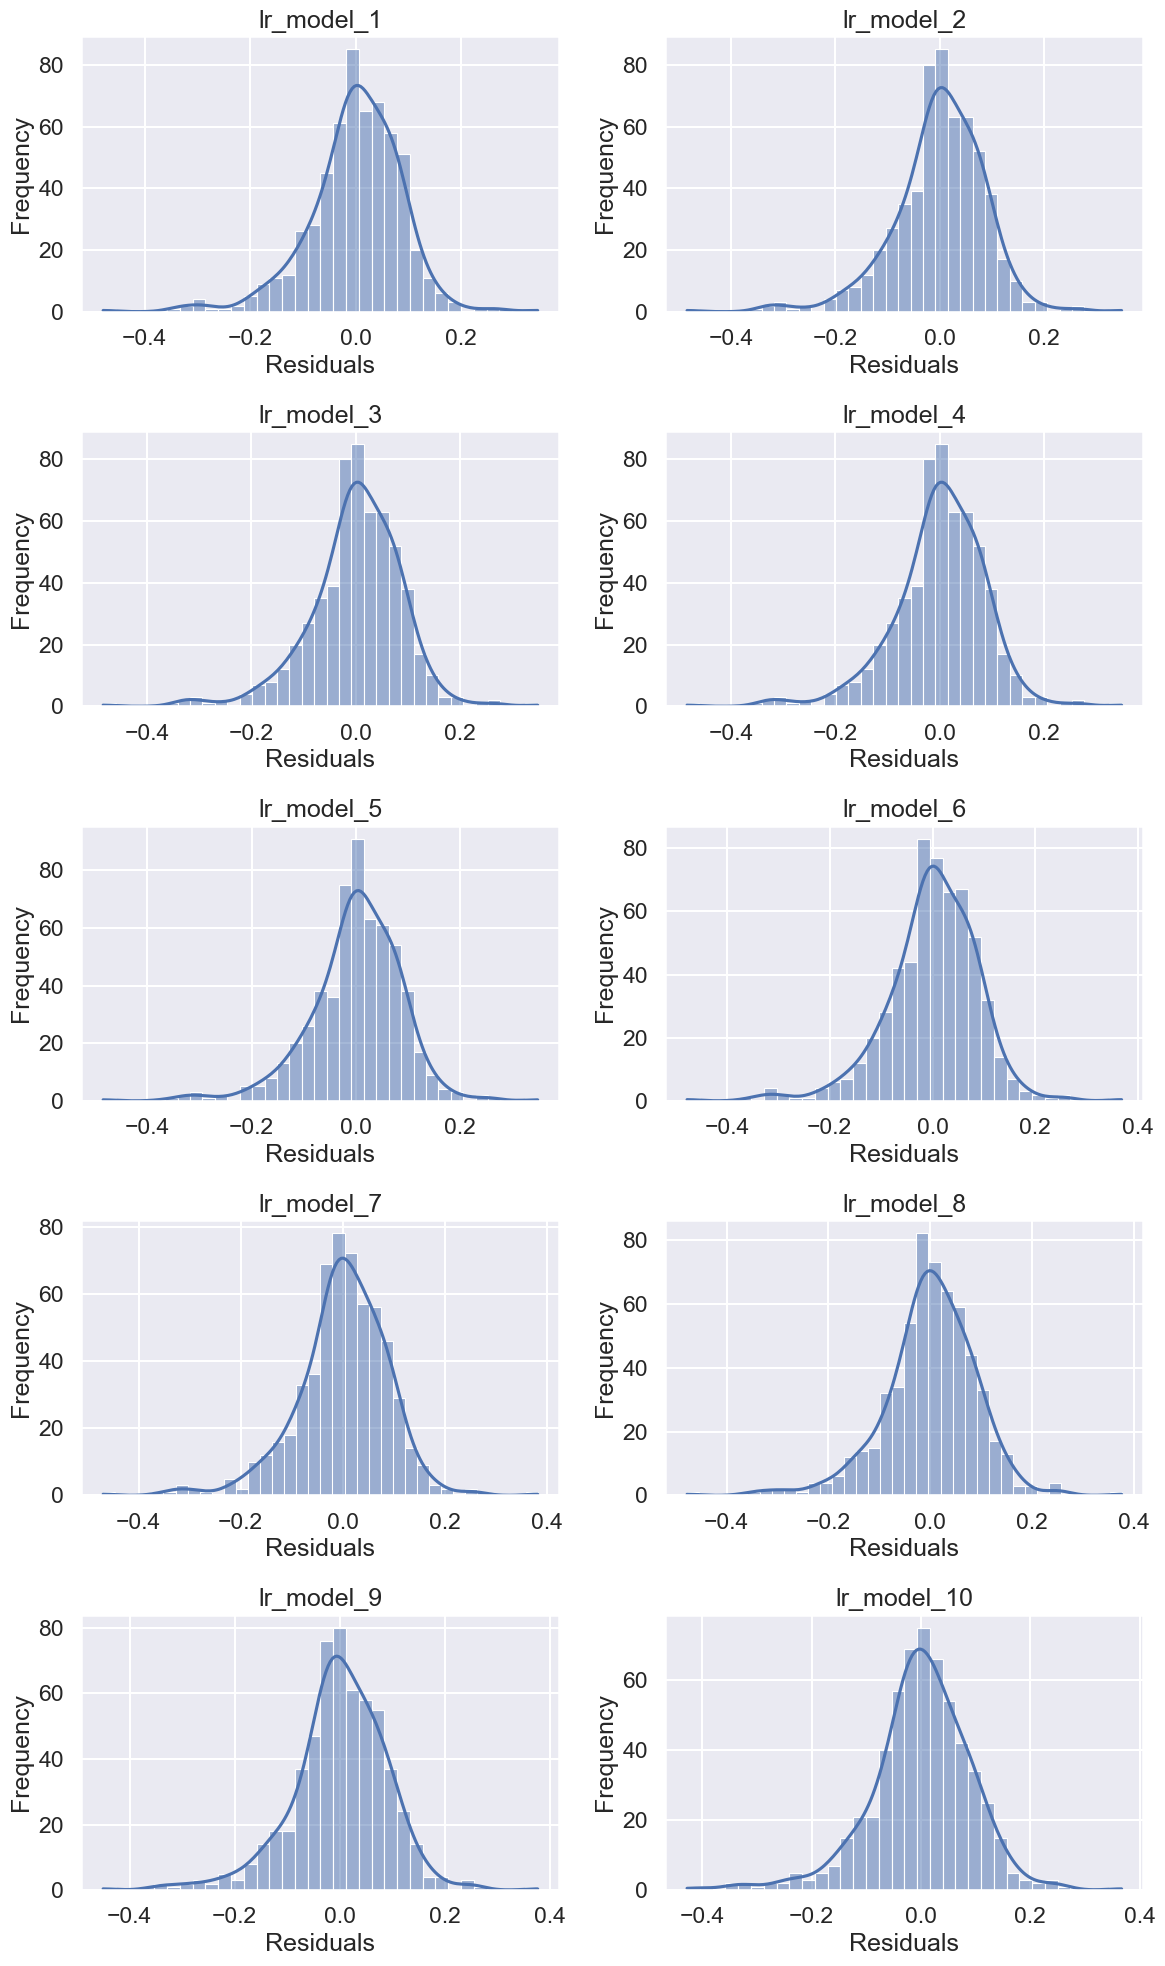

In [80]:
# Dynamic Grid Calculations
num_models = len(models)
num_columns = 2
num_rows = (num_models + num_columns - 1) // num_columns
plt.figure(figsize=(num_columns * 6, num_rows * 4))

for i, (name, model) in enumerate(models.items(), start=1):
    # For statsmodels models
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(model.resid, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(name)

plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. **Residual Distributions:** All models exhibit residuals that approximate a normal distribution, suggesting these models fit the data well.

2. **Variance Analysis:** Models 1 through 9 have low residual variance, indicating stable and consistent predictions. This indicates the ability to generalize well to the data.

3. **Residual Characteristics:** The residuals of Models 1 through 8 display a slight left shoulder. This feature might indicate potential overfitting or the influence of outliers. It suggests that the models might be overly complex and capturing outliers in the data trend.

## **<a id='model-assessment-and-comparison'>MODEL ASSESSMENT AND COMPARISON<a/>**  [▲](#top)

In [81]:
# Evaluate R-squared values
results = []

for name, model in models.items():
    # For statsmodels models
    results.append({
        "Model": name,
        "R-squared": model.rsquared,
        "Adjusted R-squared": model.rsquared_adj,
        "AIC": model.aic,
        "BIC": model.bic,
        "F-statistic": model.fvalue,
        "No. of Predictors": no_of_predictors[name],
    })

results_df = pd.DataFrame(results)
round(results_df, 4)

,Model,R-squared,Adjusted R-squared,AIC,BIC,F-statistic,No. of Predictors
0,lr_model_1,0.8588,0.8543,-1127.7693,-1044.8718,189.5832,20
1,lr_model_2,0.8579,0.8536,-1126.1402,-1047.6057,199.6324,19
2,lr_model_3,0.8579,0.8536,-1126.1402,-1047.6057,199.6324,18
3,lr_model_4,0.8579,0.8536,-1126.1402,-1047.6057,199.6324,17
4,lr_model_5,0.8577,0.8536,-1127.1103,-1052.9388,212.0474,16
5,lr_model_6,0.8564,0.8526,-1123.8661,-1054.0576,224.2077,15
6,lr_model_7,0.8542,0.8506,-1117.0921,-1051.6467,236.4296,14
7,lr_model_8,0.8514,0.8480,-1108.0270,-1046.9446,249.4243,13
8,lr_model_9,0.8472,0.8440,-1094.0902,-1037.3708,262.0700,12
9,lr_model_10,0.8437,0.8406,-1082.6437,-1030.2874,278.6521,11


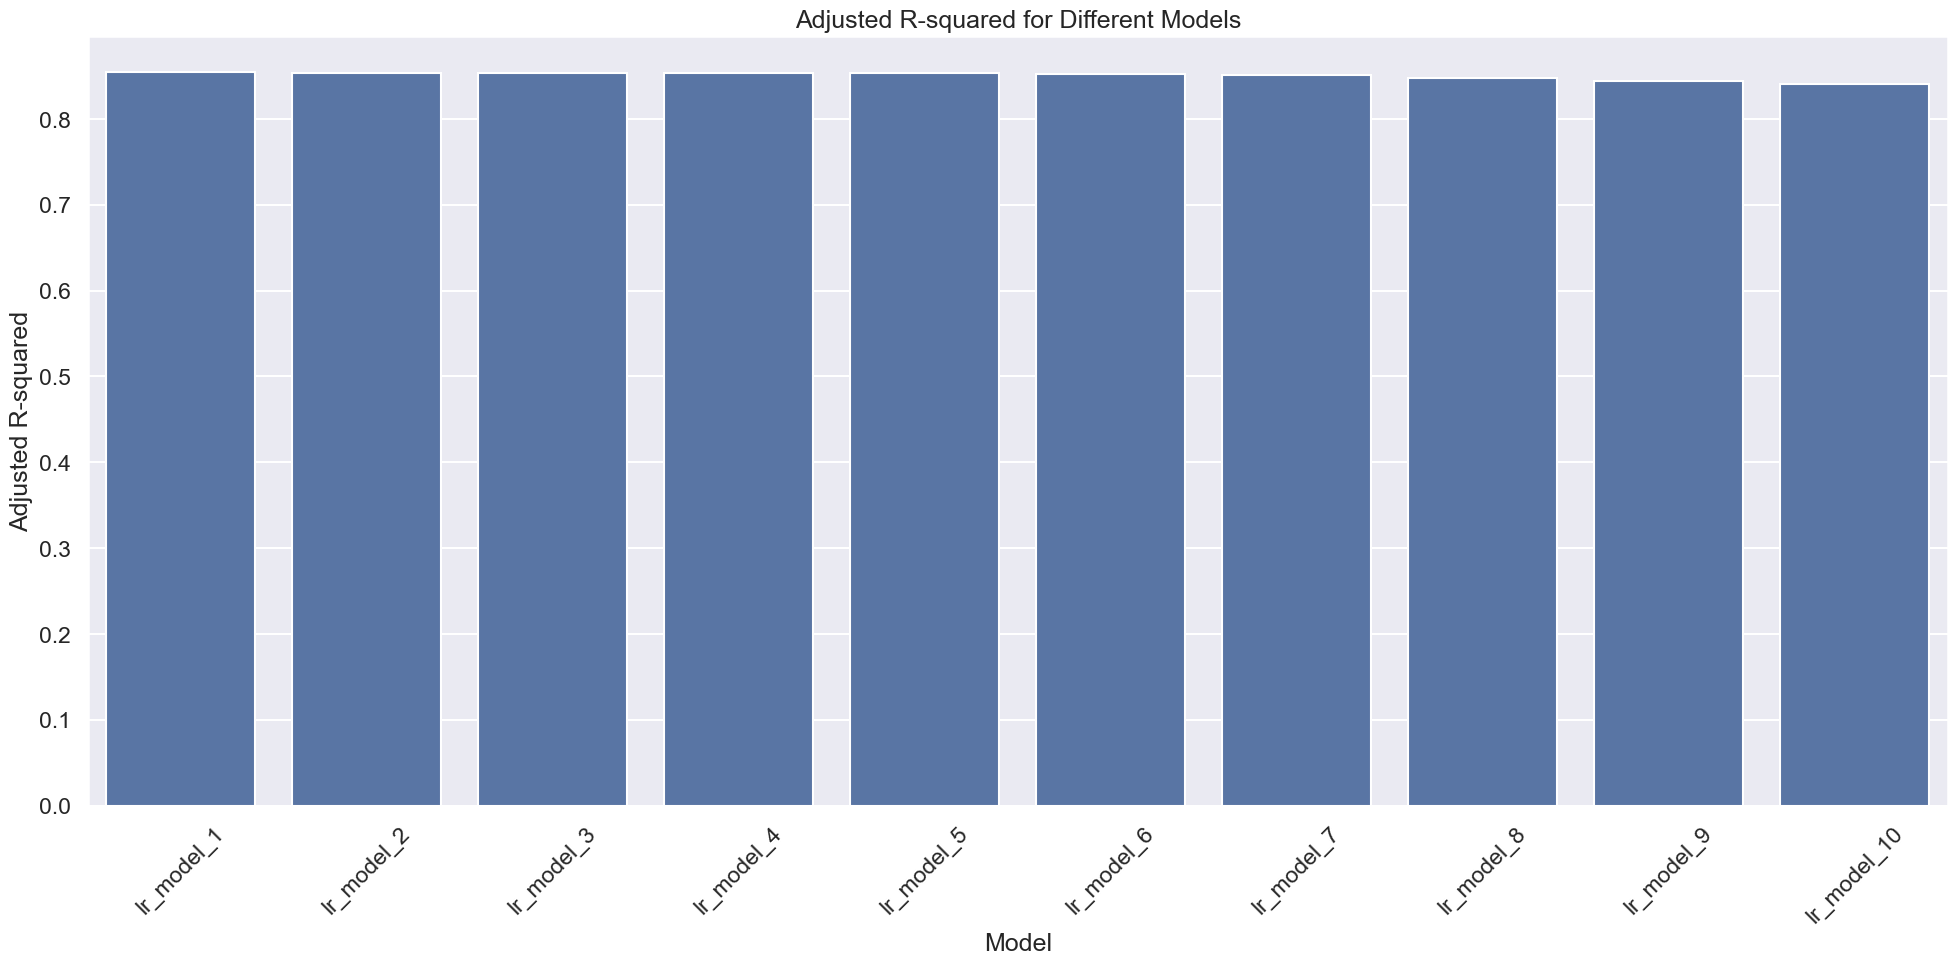

In [82]:
# Plotting Adjusted R-squared for each model
plt.figure(figsize=(24, 10))
ax = sns.barplot(x="Model", y="Adjusted R-squared", data=results_df)
plt.xticks(rotation=45)
plt.title("Adjusted R-squared for Different Models")
plt.show()

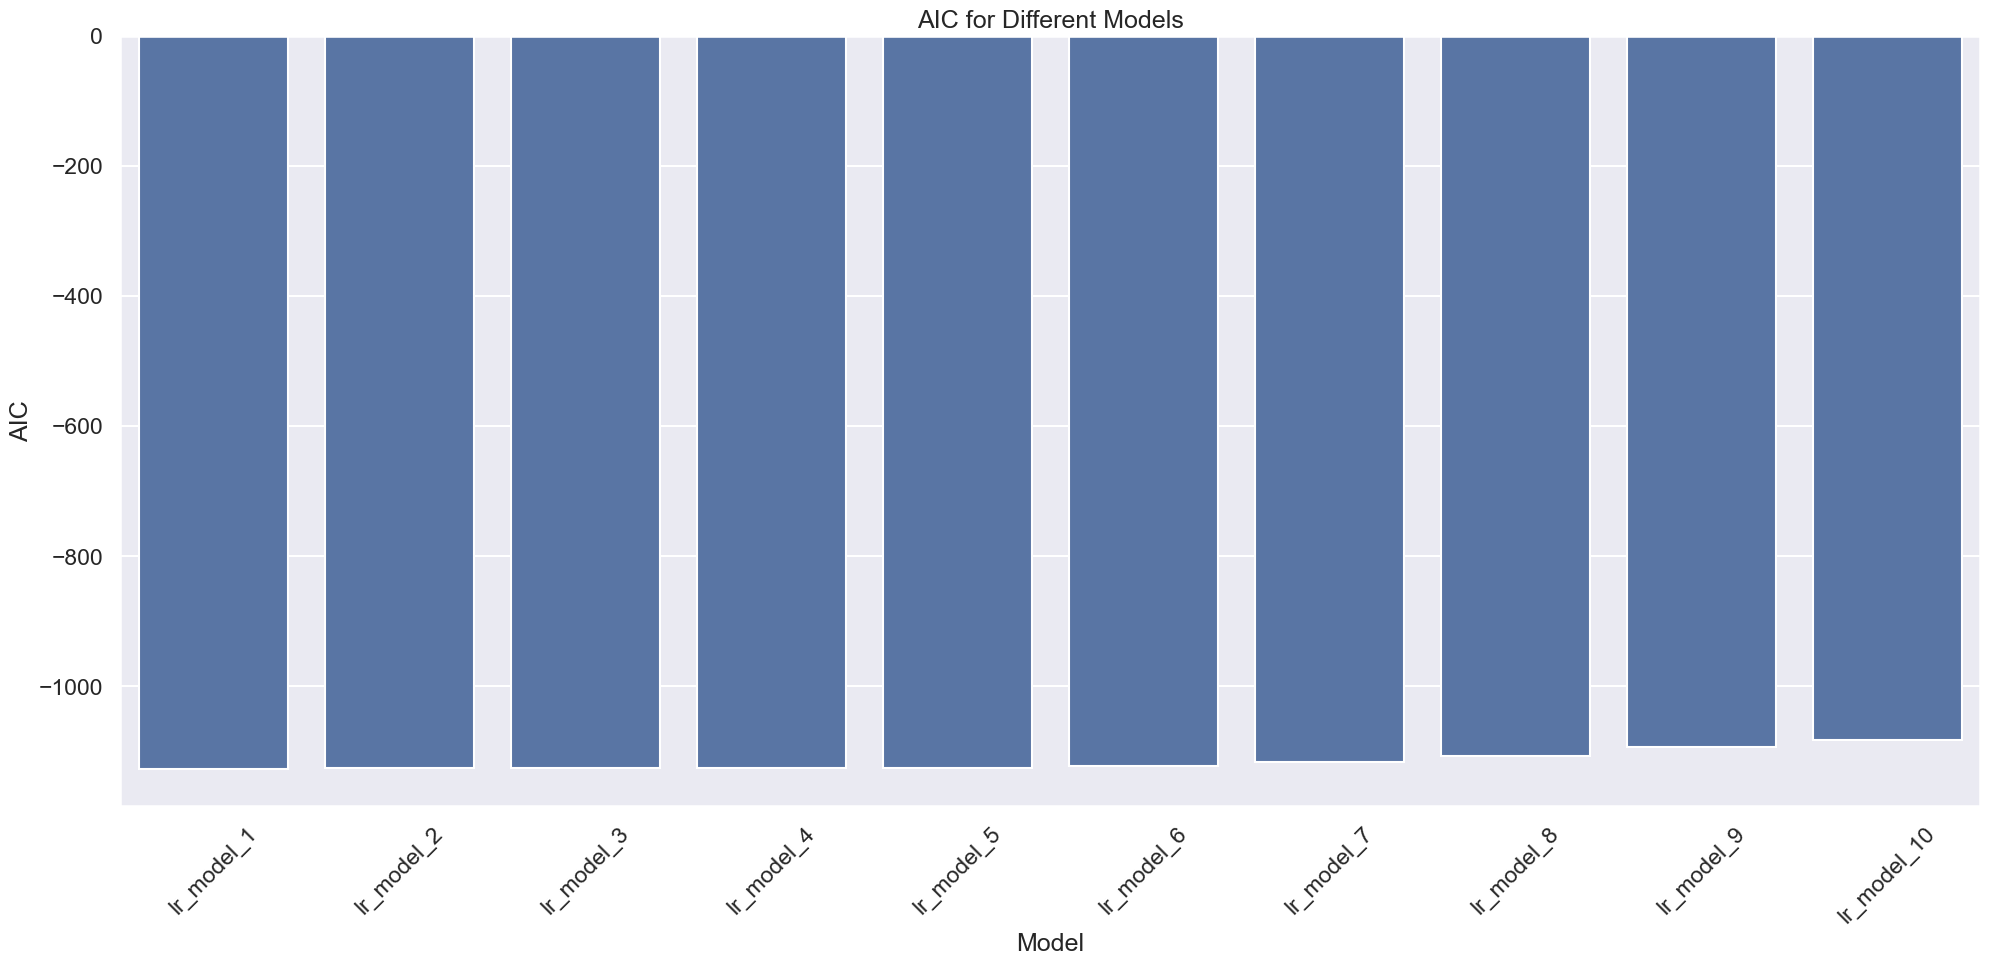

In [83]:
# Plotting AIC for each model
plt.figure(figsize=(24, 10))
ax = sns.barplot(x="Model", y="AIC", data=results_df)
plt.xticks(rotation=45)
plt.title("AIC for Different Models")

plt.show()

## **<a id='check-model-assumptions'>CHECK MODEL ASSUMPTIONS<a/>**  [▲](#top)

1. **Linearity:** The relationship between the independent variables (features) and the dependent variable (target) is linear.
2. **Homoscedasticity:** Residuals have constant variance (i.e., they are homoscedastic).
3. **Independence:** Residuals (errors) are independent of each other.
4. **Normality of Residuals:** Residuals are normally distributed.

### RESIDUALS VS. FITTED VALUES

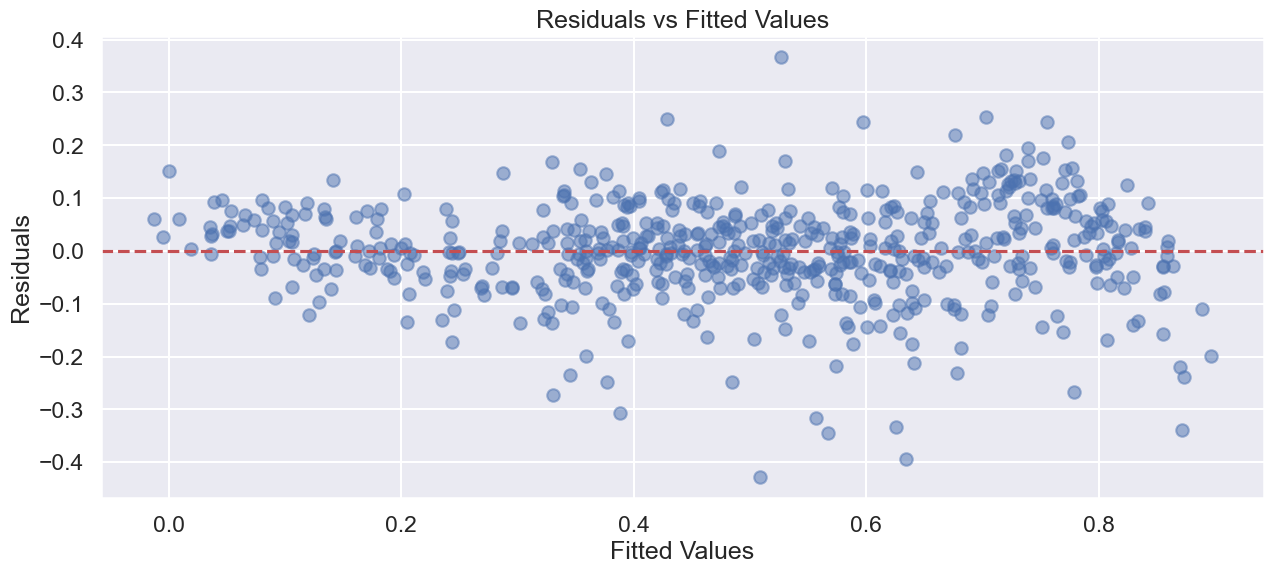

In [84]:
# Get fitted values and residuals
fitted_values = final_model_sm.fittedvalues
residuals = final_model_sm.resid

# Plot Residuals vs Fitted
plt.figure(figsize=(15, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### OBSERVATIONS

1. Fitted Values are linear about the Target Variable.
2. Variance is constant about the mean.
3. There are some outliers on the negative residual axis.

### INDEPENDENCE OF FEATURES

In [85]:
# Multicollinearity Check
feature_df = calculate_pvalues_and_vif(X_train_final, final_model_sm)
feature_df

,Feature,VIF,P-Value
0,const,62.480047,0.0
1,temperature,3.062023,0.0
2,season_spring,2.648032,0.0
3,humidity,2.143229,0.0
5,weather_situations_good,1.817248,0.0
4,season_winter,1.771790,0.0
6,working_day,1.613767,0.0
7,weekday_sat,1.606652,0.0
8,month_jul,1.294708,0.0
9,wind_speed,1.180445,0.0


In [86]:
y_train_pred = final_model.predict(X_train_final)

#R-squared Value
round(metrics.r2_score(y_train,y_train_pred), 4)

0.8437

#### OBSERVATIONS 

1. There is no multicollinearity between the features, since VIF < 5 for all.
2. R-squared is 0.842 which means the model explains a significant portion of the variability in the target variable, indicating a well-fitted model.

### NORMALITY CHECK

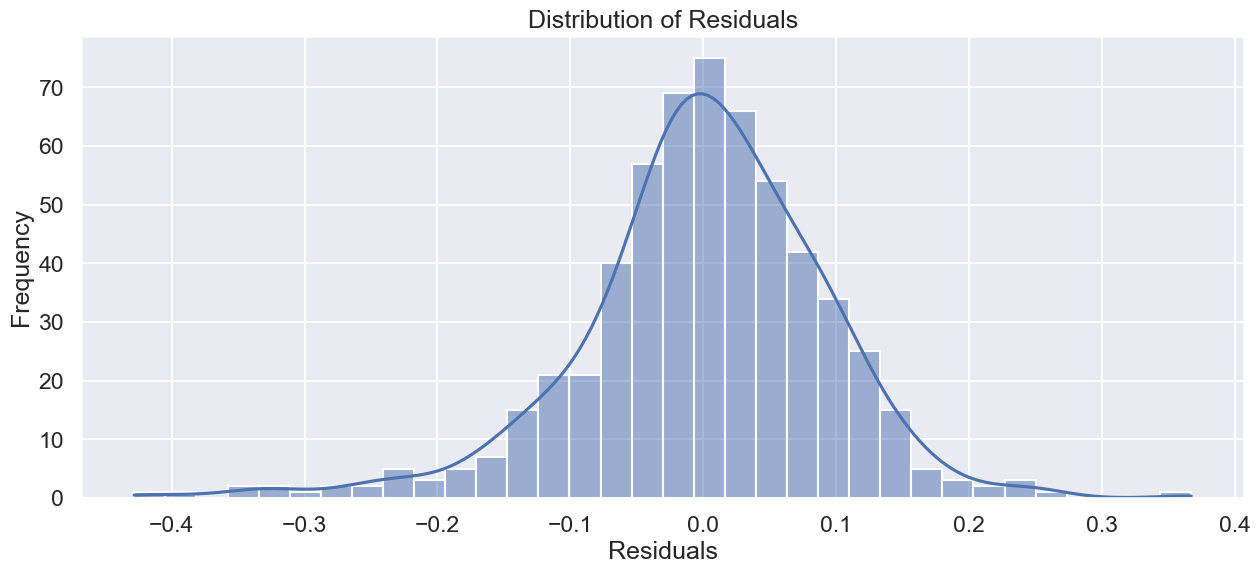

In [87]:
# Residual Analysis
plt.figure(figsize=(15, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [88]:
# Calculate the mean of residuals
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals:.2f}")

Mean of Residuals: 0.00


In [89]:
# Calculate the median of residuals
median_residuals = np.median(residuals)
print(f"Median of Residuals: {median_residuals:.2f}")

Median of Residuals: 0.00


#### OBSERVATIONS

1. **Mean = 0:** A mean of 0 for residuals suggests that, on average, the model’s predictions are neither overestimating nor underestimating the target values. This is a desirable property, as it means the model is unbiased.

2. **Normal Distribution:** If the residuals are normally distributed, it implies that the model errors are randomly distributed with no systematic patterns, which is another good indicator of a well-fitting model.

## **<a id='predictions-and-evaluation-on-the-test-set'>PREDICTIONS AND EVALUATION ON THE TEST SET<a/>**  [▲](#top)

In [90]:
# Final Model specifics:
# sklearn model name: 'final_model'
# statsmodels model name: 'final_model_sm'
# predictors: 'final_features'
# features: 'X_train_final'
# target: 'y_train'
# no. of predictors: 16
# R-squared: 0.857

In [91]:
final_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     278.7
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.33e-220
Time:                        18:46:33   Log-Likelihood:                 553.32
No. Observations:                 580   AIC:                            -1083.
Df Residuals:                     568   BIC:                            -1030.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1675      0.031      5.418      0.000       0.107       0.228
temperature                 0.5437      0.030     17.980      0.000       0.484       0.603
season_spring              -0.1155      0.015     -7.804      0.000      -0.145      -0.086
humidity                   -0.1587      0.029     -5.450      0.000      -0.216      -0.102
season_winter               0.0640      0.012      5.323      0.000       0.040       0.088
weather_situations_good     0.0470      0.011      4.300      0.000       0.026       0.069
working_day                 0.0531      0.011      4.983      0.000       0.032       0.074
weekday_sat                 0.0629      0.014      4.507      0.000       0.035       0.090
month_jul                  -0.0911      0.016     -5.640      0.000      -0.123      -0.059
wind_speed                 -0.1475      0.021     -6.980      0.000      -0.189      -0.106
weather_situations_bad     -0.1469      0.027     -5.350      0.000      -0.201      -0.093
year_2019                   0.2416      0.008     30.269      0.000       0.226       0.257
==============================================================================
Omnibus:                       72.476   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.316
Skew:                          -0.653   Prob(JB):                     6.99e-40
Kurtosis:                       5.399   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SCALING THE TEST SET

In [92]:
# Check data before scaling
df_test.head()

,holiday,working_day,temperature,apparent_temperature,humidity,wind_speed,count,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_situations_bad,weather_situations_good,weather_situations_moderate
241,0,1,26.205847,29.73520,54.8333,8.375536,5204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
494,0,1,20.739153,24.58915,55.2083,21.042221,6572,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
591,0,1,28.973347,32.70185,61.9583,11.374657,7347,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
489,0,0,25.488347,29.23040,75.6667,10.250464,6883,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
151,0,1,31.330847,36.04835,67.7083,13.875164,3974,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [93]:
# Transform the test set using the same scaler used to fit_transform the train data
df_test[num_cols] = scaler.transform(df_test[num_cols])  

# Check data after scaling
df_test.head()

,holiday,working_day,temperature,apparent_temperature,humidity,wind_speed,count,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_situations_bad,weather_situations_good,weather_situations_moderate
241,0,1,0.722754,0.689995,0.409512,0.220189,0.576240,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
494,0,1,0.556613,0.552272,0.414732,0.723525,0.741398,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
591,0,1,0.806862,0.769392,0.508700,0.339365,0.834963,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
489,0,0,0.700948,0.676485,0.699536,0.294693,0.778945,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
151,0,1,0.878510,0.858954,0.588746,0.438728,0.427744,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [94]:
# Separate features and target in the training set
X_test = df_test.drop('count', axis=1)
y_test = df_test['count']

X_test.shape, y_test.shape

((145, 30), (145,))

### PREDICT VALUES FOR TEST SET

In [95]:
final_features

['temperature',
 'season_spring',
 'humidity',
 'season_winter',
 'weather_situations_good',
 'working_day',
 'weekday_sat',
 'month_jul',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

In [96]:
#Predict the values for test data using the final_model build using sklearn 
y_test_pred = final_model.predict(X_test[final_features])

# Calculate residuals
residuals = y_test - y_test_pred

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_test_pred)
explained_variance = metrics.explained_variance_score(y_test, y_test_pred)
median_ae = metrics.median_absolute_error(y_test, y_test_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors (features)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Residual Analysis metrics
residuals = y_test - y_test_pred  # Compute residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Predictive summary
predictive_summary = {
    'Mean of Residuals': mean_residuals,
    'Standard Deviation of Residuals': std_residuals,
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Percentage Error (MAPE)': mape,
    'R^2 Score': r2,
    'Adjusted R^2': adj_r2,
    'Explained Variance Score': explained_variance,
    'Median Absolute Error': median_ae
}

# Print predictive summary
for metric, value in predictive_summary.items():
    print(f'{metric}: {value:.4f}')

Mean of Residuals: -0.0061
Standard Deviation of Residuals: 0.1066
Mean Absolute Error (MAE): 0.0773
Mean Squared Error (MSE): 0.0114
Root Mean Squared Error (RMSE): 0.1068
Mean Absolute Percentage Error (MAPE): 0.3999
R^2 Score: 0.7697
Adjusted R^2: 0.7091
Explained Variance Score: 0.7705
Median Absolute Error: 0.0565


In [97]:
print(f'R-Squared Score for Train Set: {round(final_model_sm.rsquared, 4)}\nR-Squared Score for Test Set: {round(metrics.r2_score(y_test, y_test_pred), 4)}')

R-Squared Score for Train Set: 0.8437
R-Squared Score for Test Set: 0.7697


#### OBSERVATIONS

R-squared of the `final_model` on the train data set was **0.8437** i.e. ~84.4% and on the test data set is **0.7697** i.e. ~77.0%

### MODEL PERFORMANCE EVALUATION

In [98]:
fitted_values = y_test_pred

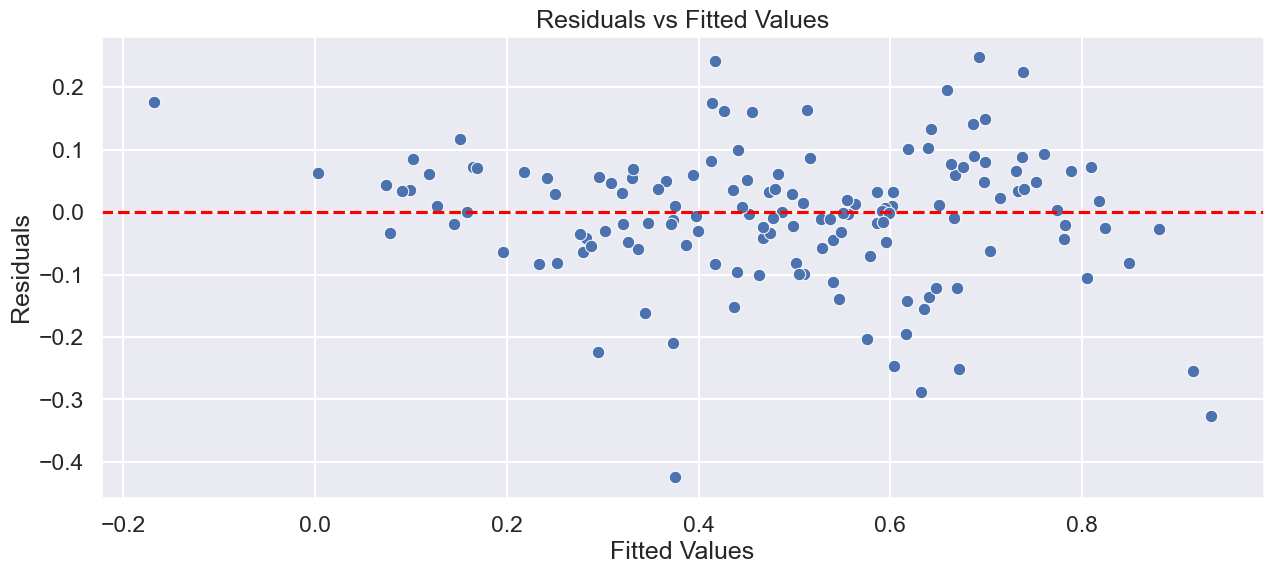

In [99]:
# Residual Plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.show()

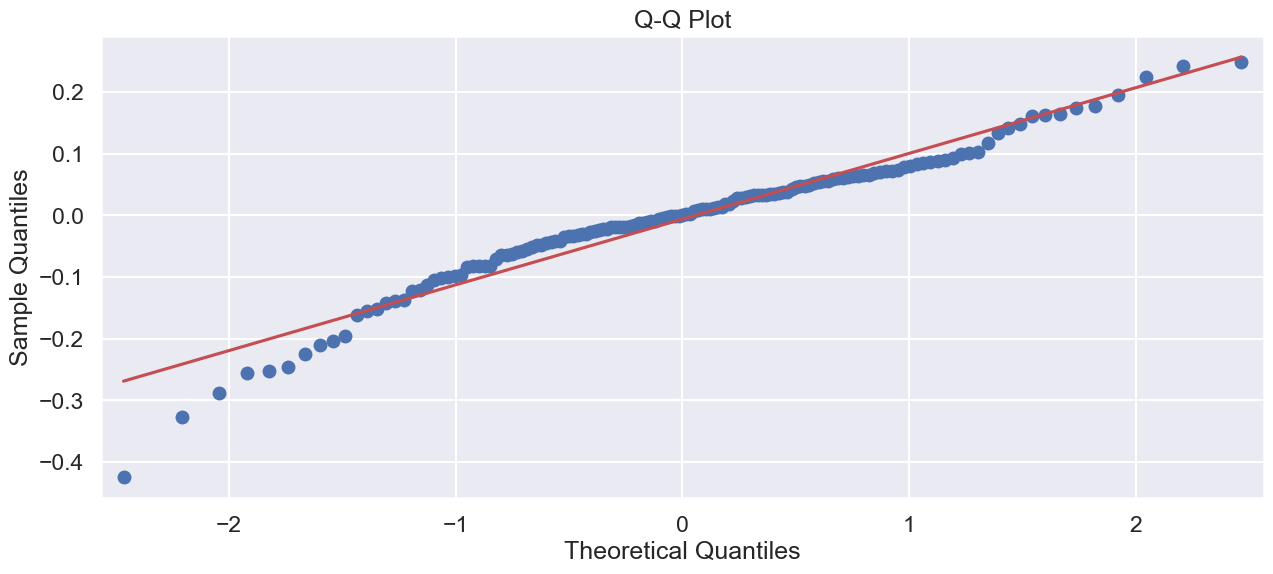

In [100]:
# Q-Q Plot
plt.figure(figsize=(15, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

plt.show()

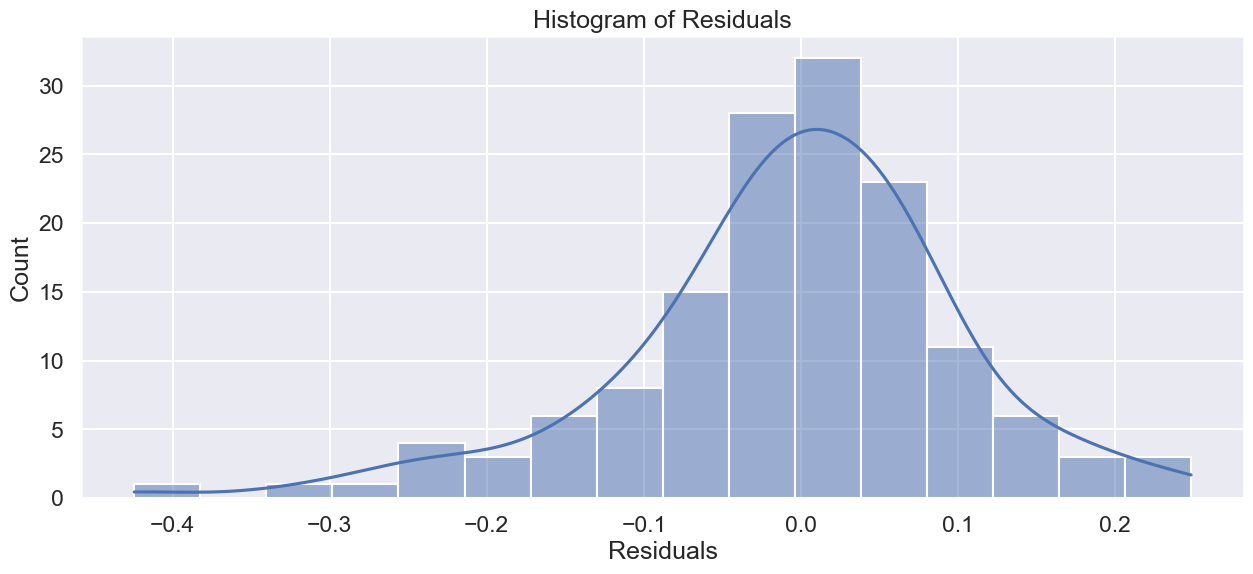

In [101]:
# Histogram of Residuals
plt.figure(figsize=(15, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.show()

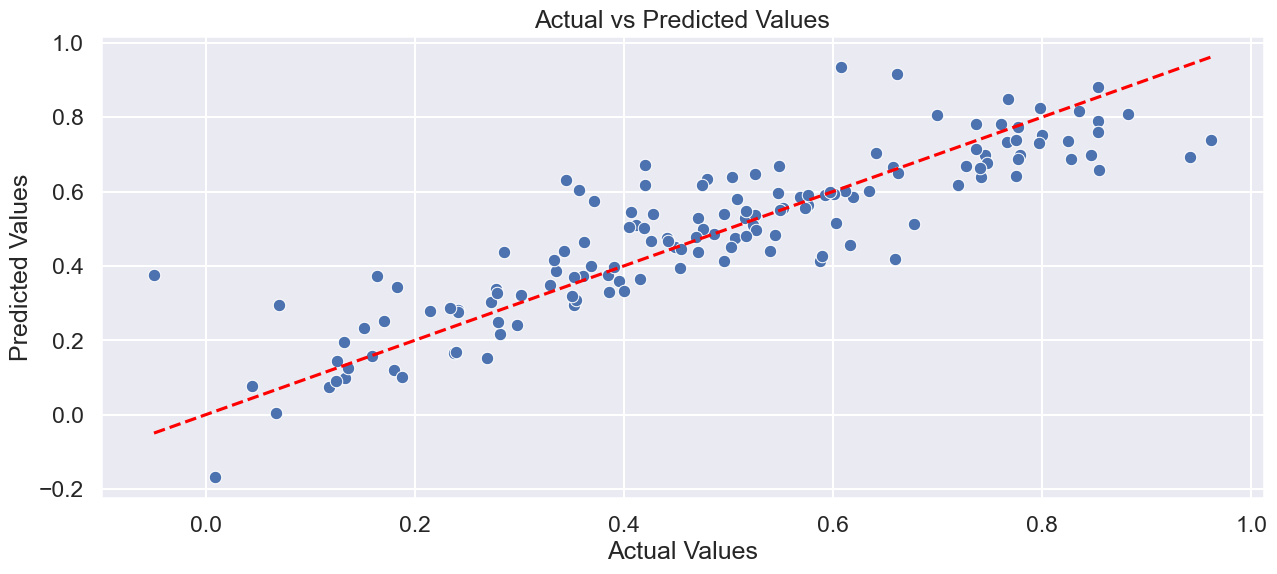

In [102]:
# Actual vs Predicted Plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.show()

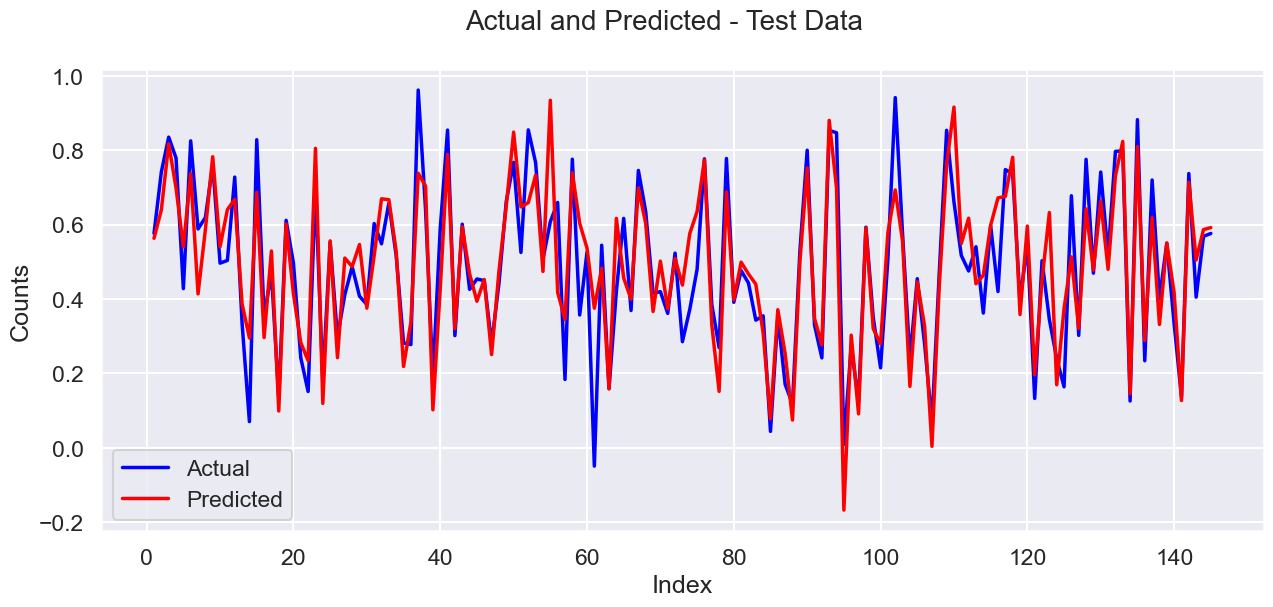

In [103]:
# Actual vs Predicted Values Over Index
fig = plt.figure(figsize=(15, 6))
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label='Actual')
plt.plot(c, y_test_pred, color="red", linewidth=2.5, linestyle="-", label='Predicted')

# Titles and labels
fig.suptitle('Actual and Predicted - Test Data', fontsize=20)
plt.xlabel('Index')
plt.ylabel('Counts')
plt.legend()

plt.show()

# CONCLUSION: FINAL MODEL INTERPRETATION 

In [104]:
intercept_final = final_model.intercept_

print('Final Linear Regression Model (sklearn):')
print(f'Intercept: {round(intercept_final, 6)}')

Final Linear Regression Model (sklearn):
Intercept: 0.167485


In [105]:
# Create a DataFrame with feature names and coefficients
coefficients_df = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': final_model.coef_,
    'Absolute Coefficient': np.abs(final_model.coef_)
})
coefficients_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)
coefficients_df.index = range(1, len(coefficients_df) + 1)
coefficients_df.drop('Absolute Coefficient', axis=1, inplace=True)

# Print the DataFrame
print('Final Linear Regression Model (sklearn):')
coefficients_df

Final Linear Regression Model (sklearn):


,Feature,Coefficient
1,temperature,0.543685
2,year_2019,0.241568
3,humidity,-0.158698
4,wind_speed,-0.147496
5,weather_situations_bad,-0.146867
6,season_spring,-0.115510
7,month_jul,-0.091094
8,season_winter,0.063997
9,weekday_sat,0.062874
10,working_day,0.053121


In [106]:
final_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     278.7
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.33e-220
Time:                        18:46:35   Log-Likelihood:                 553.32
No. Observations:                 580   AIC:                            -1083.
Df Residuals:                     568   BIC:                            -1030.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1675      0.031      5.418      0.000       0.107       0.228
temperature                 0.5437      0.030     17.980      0.000       0.484       0.603
season_spring              -0.1155      0.015     -7.804      0.000      -0.145      -0.086
humidity                   -0.1587      0.029     -5.450      0.000      -0.216      -0.102
season_winter               0.0640      0.012      5.323      0.000       0.040       0.088
weather_situations_good     0.0470      0.011      4.300      0.000       0.026       0.069
working_day                 0.0531      0.011      4.983      0.000       0.032       0.074
weekday_sat                 0.0629      0.014      4.507      0.000       0.035       0.090
month_jul                  -0.0911      0.016     -5.640      0.000      -0.123      -0.059
wind_speed                 -0.1475      0.021     -6.980      0.000      -0.189      -0.106
weather_situations_bad     -0.1469      0.027     -5.350      0.000      -0.201      -0.093
year_2019                   0.2416      0.008     30.269      0.000       0.226       0.257
==============================================================================
Omnibus:                       72.476   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.316
Skew:                          -0.653   Prob(JB):                     6.99e-40
Kurtosis:                       5.399   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Overview

We have a multiple linear regression model with the following equation:

```python
df.count = 0.167485 
            + (0.543685 * df.temperature) 
            + (0.241568 * df.year_2019)
            - (0.158698 * df.humidity)
            - (0.147496 * df.wind_speed)
            - (0.146867 * df.weather_situations_bad)
            + (0.063997 * df.season_winter)
            + (0.062874 * df.weekday_sat)
            + (0.053121 * df.working_day)
            - (0.115510 * df.season_spring)
            - (0.091094 * df.month_jul)
            + (0.047025 * df.weather_situations_good)
```
### Intercept
**Intercept (0.167485):** When all predictor variables (`temperature`, `year_2019`, `humidity`, `wind_speed`, `weather_situations_bad`, `season_winter`, `weekday_sat`, `working_day`, `season_spring`, `month_jul`, `weather_situations_good`) are zero, the expected value of the target variable is the model's intercept. In practice, this value might not be directly interpretable, especially if some predictors cannot realistically be zero (e.g., `temperature`, `humidity`). It often serves as a baseline from which the effects of predictors are measured.

### Coefficients Interpretation
**Temperature (0.543685):** For each one-unit increase in temperature, the target variable increases by 0.543685 units, holding all other variables constant. This positive coefficient suggests that higher temperatures are associated with an increase in the target variable.

**Year 2019 (0.241568):** Being in the year 2019 (as opposed to another reference year) increases the target variable by 0.241568 units, holding other variables constant. This indicates that the target variable was higher in 2019 compared to the reference year.

**Humidity (-0.158698):** For each one-unit increase in humidity, the target variable decreases by 0.158698 units, holding all other variables constant. This negative coefficient implies that higher humidity is associated with a decrease in the target variable.

**Wind Speed (-0.147496):** For each one-unit increase in wind speed, the target variable decreases by 0.147496 units, holding all other variables constant. This negative coefficient suggests that higher wind speeds are associated with a decrease in the target variable.

**Weather Situations Bad (-0.146867):** When weather situations are bad (relative to good weather, assuming binary coding), the target variable decreases by 0.146867 units, holding other variables constant. This suggests that bad weather situations are associated with a decrease in the target variable.

**Season Winter (0.063997):** During the winter season (relative to another reference season), the target variable increases by 0.063997 units, holding other variables constant. This implies that winter is associated with an increase in the target variable compared to the reference season.

**Weekday Saturday (0.062874):** On Saturdays (relative to the reference weekday), the target variable increases by 0.062874 units, holding other variables constant. This suggests that Saturdays are associated with an increase in the target variable compared to the reference weekday.

**Working Day (0.053121):** On working days (relative to non-working days), the target variable increases by 0.053121 units, holding other variables constant. This suggests that working days are associated with an increase in the target variable.

**Season Spring (-0.115510):** During the spring season (relative to another reference season), the target variable decreases by 0.115510 units, holding other variables constant. This suggests that spring is associated with a decrease in the target variable compared to the reference season.

**Month July (-0.091094):** In July (relative to the reference month), the target variable decreases by 0.091094 units, holding other variables constant. This suggests that July is associated with a decrease in the target variable compared to the reference month.

**Weather Situations Good (0.047025):** When weather situations are good (relative to bad weather), the target variable increases by 0.047025 units, holding other variables constant. This suggests that good weather situations are associated with an increase in the target variable.

### Summary
**Positive Coefficients:** All the following features have positive effects on the target variable, meaning that increases in these variables are associated with an increase in the target variable:
- `temperature`
- `year_2019`
- `season_winter`
- `weekday_sat`
- `working_day`
- `weather_situations_good`

**Negative Coefficients:** The following features have negative effects on the target variable, meaning that increases in these variables are associated with a decrease in the target variable:
- `humidity`
- `wind_speed`
- `weather_situations_bad`
- `season_spring`
- `month_jul`

In [107]:
# Extract Summary data for Hypothesis Testing on the coefficients
model_summary = final_model_sm.summary2().tables[1]

# Extract relevant columns for the table
table = model_summary[['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']].rename(
    columns={
        'Coef.': 'Coefficient',
        'Std.Err.': 'Std. Error',
        't': 't-Value',
        'P>|t|': 'P-Value',
        '[0.025': '95% CI (Lower)',
        '0.975]': '95% CI (Upper)'
    }
)

table

,Coefficient,Std. Error,t-Value,P-Value,95% CI (Lower),95% CI (Upper)
const,0.167485,0.030913,5.417947,8.917909e-08,0.106767,0.228203
temperature,0.543685,0.030238,17.979942,1.494869e-57,0.484292,0.603078
season_spring,-0.115510,0.014801,-7.804455,2.887877e-14,-0.144581,-0.086440
humidity,-0.158698,0.029118,-5.450088,7.513936e-08,-0.215891,-0.101505
season_winter,0.063997,0.012022,5.323313,1.469428e-07,0.040384,0.087610
weather_situations_good,0.047025,0.010937,4.299755,2.012511e-05,0.025544,0.068506
working_day,0.053121,0.010659,4.983445,8.304855e-07,0.032184,0.074057
weekday_sat,0.062874,0.013949,4.507380,7.974155e-06,0.035476,0.090272
month_jul,-0.091094,0.016151,-5.640016,2.683517e-08,-0.122817,-0.059370
wind_speed,-0.147496,0.021131,-6.980180,8.253260e-12,-0.189000,-0.105992


### Hypothesis Testing for Coefficients

For each predictor $ X_i $ in the model, we test the following hypotheses:

- **Null Hypothesis ($ H_0 $):** $ \beta_i = 0 $ (The predictor has no effect on the target variable.)
- **Alternative Hypothesis ($ H_1 $):** $ \beta_i \neq 0 $ (The predictor does have an effect on the target variable.)

The test statistic for each coefficient is calculated using the formula:

$
t = \frac{\text{coef}}{\text{std err}}
$

where `coef` is the coefficient value and `std err` is the standard error of the coefficient. The p-value associated with the t-statistic indicates whether the coefficient is significantly different from zero.


### Interpretation

---

1. **Intercept (const):**
   - **Coefficient:** 0.1675
   - **Standard Error:** 0.0309
   - **t-Statistic:** 5.418
   - **P-Value:** 0.000
   - **Interpretation:** Since the p-value is less than the significance level of 0.05, we reject the null hypothesis. This indicates that the intercept is statistically significant, meaning the baseline value of the target variable is significantly different from zero when all predictor variables are zero.

---
2. **Temperature:**
   - **Coefficient:** 0.5437
   - **Standard Error:** 0.0302
   - **t-Statistic:** 17.980
   - **P-Value:** 0.000
   - **Interpretation:** Given that the p-value is less than 0.05, we reject the null hypothesis. This suggests that temperature has a significant positive effect on the target variable, with a 0.5437 unit increase for each unit increase in temperature.
---
3. **Season Spring (season_spring):**
   - **Coefficient:** -0.1155
   - **Standard Error:** 0.0148
   - **t-Statistic:** -7.804
   - **P-Value:** 0.000
   - **Interpretation:** Since the p-value is below 0.05, we reject the null hypothesis. This implies that being in spring has a significant negative impact on the target variable.
---

4. **Humidity:**
   - **Coefficient:** -0.1587
   - **Standard Error:** 0.0291
   - **t-Statistic:** -5.450
   - **P-Value:** 0.000
   - **Interpretation:** As the p-value is less than 0.05, we reject the null hypothesis. This indicates that humidity has a significant negative effect on the target variable.
---

5. **Season Winter (season_winter):**
   - **Coefficient:** 0.0640
   - **Standard Error:** 0.0120
   - **t-Statistic:** 5.323
   - **P-Value:** 0.000
   - **Interpretation:** The p-value is less than 0.05, so we reject the null hypothesis. This suggests that the winter season has a significant positive impact on the target variable.
---

6. **Weather Situations Good (weather_situations_good):**
   - **Coefficient:** 0.0470
   - **Standard Error:** 0.0109
   - **t-Statistic:** 4.300
   - **P-Value:** 0.000
   - **Interpretation:** The p-value is less than 0.05, so we reject the null hypothesis. This means that good weather situations have a significant positive impact on the target variable.
---

7. **Working Day (working_day):**
   - **Coefficient:** 0.0531
   - **Standard Error:** 0.0107
   - **t-Statistic:** 4.983
   - **P-Value:** 0.000
   - **Interpretation:** Since the p-value is below 0.05, we reject the null hypothesis. This indicates that working days have a significant positive effect on the target variable.
---

8. **Weekday Saturday (weekday_sat):**
   - **Coefficient:** 0.0629
   - **Standard Error:** 0.0139
   - **t-Statistic:** 4.507
   - **P-Value:** 0.000
   - **Interpretation:** Given that the p-value is less than 0.05, we reject the null hypothesis. This suggests that Saturday has a significant positive effect on the target variable.
---

9. **Month July (month_jul):**
   - **Coefficient:** -0.0911
   - **Standard Error:** 0.0162
   - **t-Statistic:** -5.640
   - **P-Value:** 0.000
   - **Interpretation:** The p-value is less than 0.05, so we reject the null hypothesis. This indicates that being in July has a significant negative effect on the target variable.
---

10. **Wind Speed (wind_speed):**
    - **Coefficient:** -0.1475
    - **Standard Error:** 0.0211
    - **t-Statistic:** -6.980
    - **P-Value:** 0.000
    - **Interpretation:** As the p-value is less than 0.05, we reject the null hypothesis. This indicates that wind speed has a significant negative effect on the target variable.
---

11. **Weather Situations Bad (weather_situations_bad):**
    - **Coefficient:** -0.1469
    - **Standard Error:** 0.0275
    - **t-Statistic:** -5.350
    - **P-Value:** 0.000
    - **Interpretation:** Since the p-value is below 0.05, we reject the null hypothesis. This suggests that bad weather situations have a significant negative impact on the target variable.
---

12. **Year 2019 (year_2019):**
    - **Coefficient:** 0.2416
    - **Standard Error:** 0.0080
    - **t-Statistic:** 30.269
    - **P-Value:** 0.000
    - **Interpretation:** As the p-value is less than 0.05, we reject the null hypothesis. This indicates that the year 2019 has a significant positive effect on the target variable.
---

### Summary

All predictors in the model are statistically significant, as indicated by their p-values being less than 0.05. This suggests that each predictor has a meaningful impact on the target variable. The direction and magnitude of their effects are reflected in the coefficients, which provide insights into how each predictor influences the target variable.

---


## Key Insights for BoomBikes

1. **Temperature:**
   - **Coefficient:** 0.5437 (p < 0.001)
   - **Insight:** Each 1°C increase in temperature is associated with approximately 0.54 additional bike rentals. Warmer temperatures significantly boost bike usage. Ensure bike availability and marketing align with warmer weather.
---

2. **Seasonal Effects:**
   - **Spring:** Coefficient = -0.1155 (p < 0.001)
     - **Insight:** Lower bike rentals in spring. Spring weather may be less favorable for biking.
   - **Winter:** Coefficient = 0.0640 (p < 0.001)
     - **Insight:** Slightly higher bike rentals in winter. Consider promotions or increased availability during winter months.
---

3. **Humidity:**
   - **Coefficient:** -0.1587 (p < 0.001)
   - **Insight:** Each 1% increase in humidity decreases bike rentals by 0.16. High humidity makes biking less comfortable. Adjust availability or provide incentives during high humidity periods.
---

4. **Weather Situations:**
   - **Good Weather:** Coefficient = 0.0470 (p < 0.001)
     - **Insight:** More bike rentals in good weather. Increase marketing efforts during favorable weather conditions.
   - **Bad Weather:** Coefficient = -0.1469 (p < 0.001)
     - **Insight:** Significant decrease in bike rentals in bad weather. Offer promotions or adjust availability during bad weather.
---

5. **Working Day:**
   - **Coefficient:** 0.0531 (p < 0.001)
   - **Insight:** Higher bike rentals on working days. Optimize scheduling and availability for weekdays.
---

6. **Weekday_Saturday:**
   - **Saturday:** Coefficient = 0.0629 (p < 0.001)
   - **Insight:** Higher bike rentals on Saturdays. Ensure higher bike availability and consider weekend promotions.
---

7. **Month Effects:**
   - **July:** Coefficient = -0.0911 (p < 0.001)
   - **Insight:** Decrease in bike rentals in July. Adjust marketing strategies to address potential drops in demand.
---

8. **Wind Speed:**
   - **Coefficient:** -0.1475 (p < 0.001)
   - **Insight:** Higher wind speeds decrease bike rentals. Provide weather-related information or incentives during windy days.
---

9. **Year Effect:**
   - **2019:** Coefficient = 0.2416 (p < 0.001)
   - **Insight:** Significant increase in bike rentals in 2019. Positive growth trend in the bike-sharing market. Adapt strategies to sustain this growth.
---

### Recommendations:
- **Optimize Bike Availability:** Align with favorable weather and peak days.
- **Targeted Promotions:** Seasonal and weather-related promotions to boost rentals.
- **Weather Forecast Integration:** Adjust bike availability and marketing based on weather forecasts.
- **Monitor Trends:** Continuously monitor and adapt strategies to seasonal and annual trends.
